In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2

debugMode = False

#基本的なコード
#フォントサイズの変更
plt.rcParams["font.size"] = 28
plt.rcParams['font.family'] = "IPAexGothic"

Duplicate key in file PosixPath('/Users/k22120kk/.pyenv/versions/3.10.5/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'), line 262 ('font.family:  sans-serif')


In [2]:
# csvの読み込み
# ヘッダなしの場合csv = pd.read_csv("ファイル名(.csv)", header=None, names=['user_id', 'name'])で可能
fname = "../data/3回目/"
acc = pd.read_csv(fname+"acc.csv",encoding = 'utf-8')
ans = pd.read_csv(fname+"ans.csv",encoding = 'utf-8')

print(acc)
print(ans)

            time         x         y         z       abs
0       0.273055  0.114922  0.057461 -0.124498  0.178910
1       0.293081 -0.086191  0.134075 -0.201113  0.256616
2       0.313069 -0.019154  0.229843 -0.268151  0.353694
3       0.333063 -0.095768  0.239420 -0.095768  0.275073
4       0.353052  0.076614  0.095768  0.248997  0.277562
...          ...       ...       ...       ...       ...
8308  166.433056  0.306458 -1.877054  1.369483  2.343658
8309  166.453035 -0.603339 -1.350330  0.181959  1.490140
8310  166.473053 -0.900220 -0.976834  1.934515  2.346689
8311  166.493052 -0.248997 -1.426944 -0.622492  1.576600
8312  166.513101  0.555455 -1.637634 -1.570596  2.336054

[8313 rows x 5 columns]
            time content
0  1692566110576     止まる
1  1692566123808      歩く
2  1692566153810      走る
3  1692566176662      歩く
4  1692566213808      走る
5  1692566233789      歩く
6  1692566235061     止まる


止まる
17.0 30.232
歩く
30.232 60.234
走る
60.234 83.086
歩く
83.086 120.232
走る
120.232 140.213
歩く
140.213 141.485
止まる
141.485 166.513101


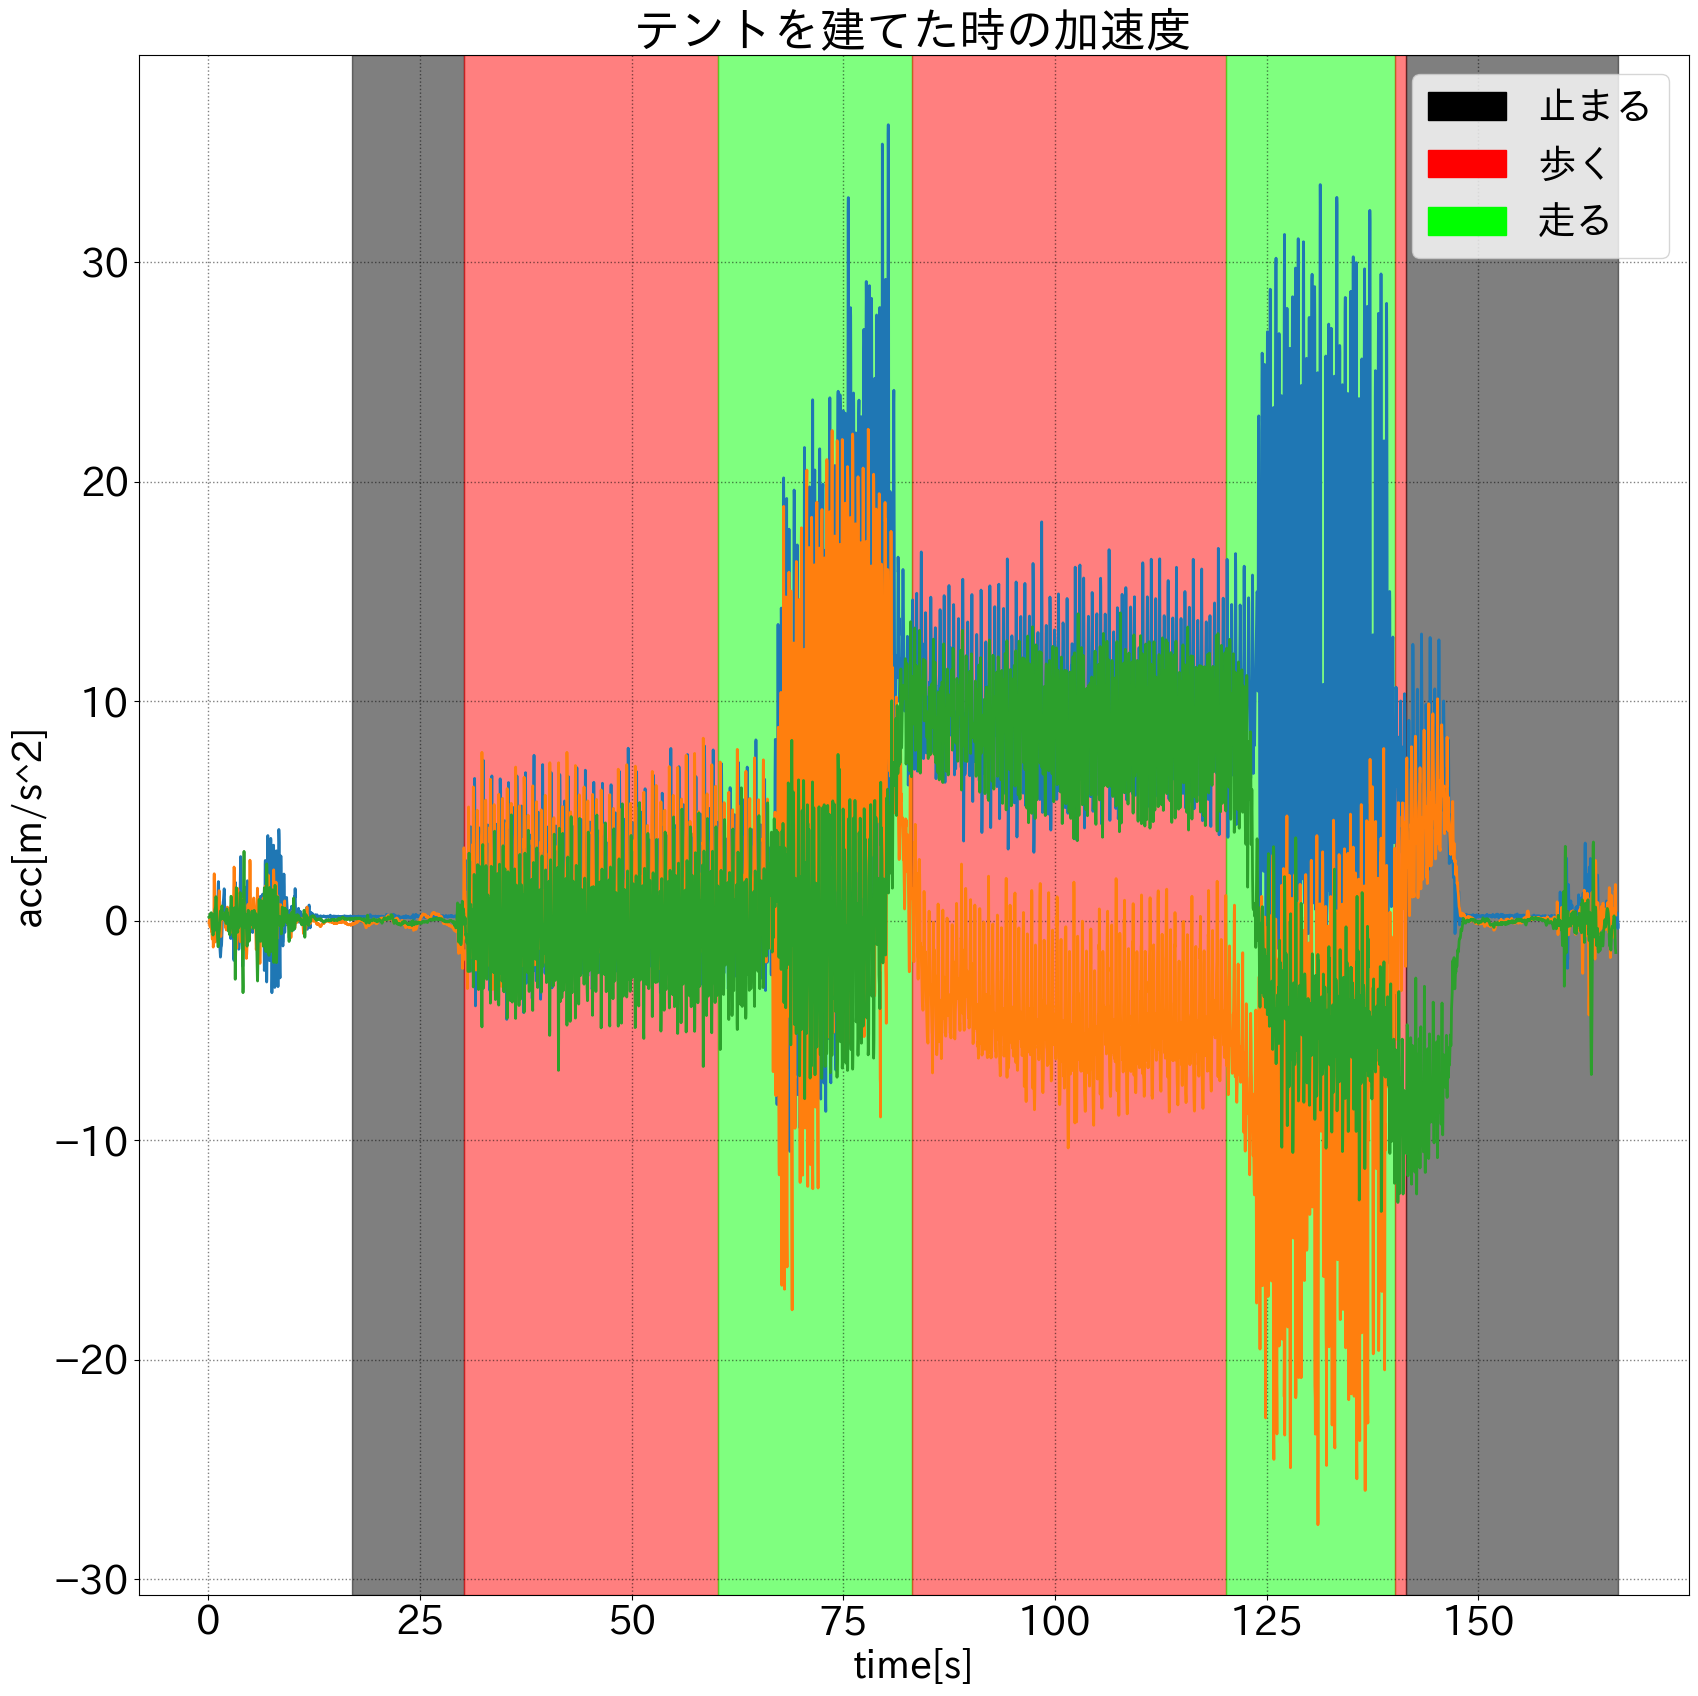

In [3]:
fig = plt.figure(figsize=(20, 20))
## 一つの画像内に複数のグラフを表示させる場合に使用
ax3 = fig.add_subplot(1, 1, 1)
## グリッドの設定
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
## グラフのタイトル
ax3.set_title("テントを建てた時の加速度")
## x軸のラベル
ax3.set_xlabel('time[s]')
## y軸のラベル
ax3.set_ylabel('acc[m/s^2]')
## y軸の値をオフセットなしで表示
ax3.get_yaxis().get_major_formatter().set_useOffset(False)
## グラフの描画
## ax1.plot(x軸データ,y軸データ,label="ラベル名")
## x軸を最初のデータからの相対時間で表示させています

# データの操作
## ノイズ除去
ax3.plot(
    (acc["time"]),
    acc["x"].rolling(window=5).mean(),
    label="x軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["z"].rolling(window=5).mean(),
    label="z軸",
    linewidth=2,  # 線の太さを指定
)

ax3.plot(
    (acc["time"] - acc["time"][0]),
    acc["y"].rolling(window=5).mean(),
    label="y軸",
    linewidth=2,  # 線の太さを指定
)

ax3.legend()

# 各contentに対応する色の辞書を作成
content_colors = {
    "止まる": "#000000",
    "歩く": "#ff0000",
    "走る": "#00ff00"
}

# 階段利用区間をラベリング
for i in range(len(ans)):
    content = ans["content"][i]  # 現在のデータのcontent
    print(content)
    color = content_colors.get(content, "#808080")  # 現在のデータのcontentに対応する色
    start_time = (ans["time"][i] - ans["time"][0] + 17000) / 1000
    end_time = 0
    if i < len(ans) - 1 :
        end_time = (ans["time"][i + 1] - ans["time"][0] + 17000) / 1000
    else :
        end_time = (acc["time"].max())

    print(start_time, end_time)
    ax3.axvspan(start_time, end_time, color=color, alpha=0.5, zorder=1)

# 凡例の作成
content_labels = list(content_colors.keys())
content_patches = [matplotlib.patches.Patch(color=color) for color in content_colors.values()]

# 凡例の表示
ax3.legend(content_patches, content_labels, loc="upper right")

plt.show()

In [4]:
# content毎に分割して、BLEのデータをFFTしてみる
# 椅子に座るだけ取得したデータを使う
# ansデータを使って、椅子に座っているかどうかを判定する

# 1. windowサイズ20データ分を用いて、FFTを行う
window_size = 200
for i in range(0, len(acc) - window_size, window_size):
    # 1.1. windowサイズ20データ分を取得する
    fft_acc_data = acc[i:i+window_size]   

    print(f"window_data: {fft_acc_data}")

    # print(f"fft_isu_data: {len(fft_isu_data)}")
    # print(f"fft_tent_data: {len(fft_tent_data)}")

    if debugMode:
        # fft_isu_dataをグラフ化する
        ## ｘ軸を時間にする
        ## y軸をrssiにする

        # 2. データをグラフ化する
        # 2.1. グラフのタイトルを設定する
        plt.figure(figsize=(20, 20))
        plt.title(f"加速度のデータ　{window_size}個分")
        # 2.2. グラフのx軸のラベルを設定する
        plt.xlabel("time(s)")
        # 2.3. グラフのy軸のラベルを設定する
        plt.ylabel("acc (m/s^2))")
        # 2.4. グラフのx軸の表示範囲を設定する
        # plt.xlim(start_time, end_time)
        # 2.5. グラフのy軸の表示範囲を設定する
        # plt.ylim(-100, -40)
        # 2.6. グラフにデータを追加する
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["x"].rolling(window=10).mean(), label="x")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["y"].rolling(window=10).mean(), label="y")
        plt.plot([(x - fft_acc_data["time"].iloc[0]) / 1000 for x in fft_acc_data["time"]],fft_acc_data["z"].rolling(window=10).mean(), label="z")



        # 2.7. グラフに凡例を追加する
        plt.legend()
        # 2.8. グラフを表示する
        plt.show()






window_data:          time         x         y         z       abs
0    0.273055  0.114922  0.057461 -0.124498  0.178910
1    0.293081 -0.086191  0.134075 -0.201113  0.256616
2    0.313069 -0.019154  0.229843 -0.268151  0.353694
3    0.333063 -0.095768  0.239420 -0.095768  0.275073
4    0.353052  0.076614  0.095768  0.248997  0.277562
..        ...       ...       ...       ...       ...
195  4.173077  0.679953 -0.019154  1.426944  1.580782
196  4.193112  0.967257 -0.143652  1.493982  1.785554
197  4.213060  1.398214  0.019154  0.679953  1.554897
198  4.233055  2.030283 -0.430956  0.632069  2.169628
199  4.253060  2.030283 -0.430956  0.632069  2.169628

[200 rows x 5 columns]
window_data:          time         x         y         z       abs
200  4.273045  1.283292 -1.800440  0.756568  2.336839
201  4.293283 -0.938527 -3.734955 -1.034295  3.987541
202  4.313046  0.201113 -2.068590 -0.737414  2.205287
203  4.333060 -0.651223 -3.112462 -1.666364  3.590026
204  4.353052 -1.714248 -3.71580

window_data:          time         x         y         z       abs
0    0.273055  0.114922  0.057461 -0.124498  0.178910
1    0.293081 -0.086191  0.134075 -0.201113  0.256616
2    0.313069 -0.019154  0.229843 -0.268151  0.353694
3    0.333063 -0.095768  0.239420 -0.095768  0.275073
4    0.353052  0.076614  0.095768  0.248997  0.277562
..        ...       ...       ...       ...       ...
195  4.173077  0.679953 -0.019154  1.426944  1.580782
196  4.193112  0.967257 -0.143652  1.493982  1.785554
197  4.213060  1.398214  0.019154  0.679953  1.554897
198  4.233055  2.030283 -0.430956  0.632069  2.169628
199  4.253060  2.030283 -0.430956  0.632069  2.169628

[200 rows x 5 columns]
サンプリング周波数: 50251.20039904196 Hz
サンプリング間隔: 1.9900022130000004e-05 sec
収録時間: 0.003980004426
データ数: 199
最大周波数: 25125.60019952098 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.34090203595 Hz
最大周波数の振幅: [0.54238265 0.51099123 0.18955067 0.23464212 0.27565827 0.2195534
 0.20232575 0.1621634  0.08567849 0.08748606 0.0670

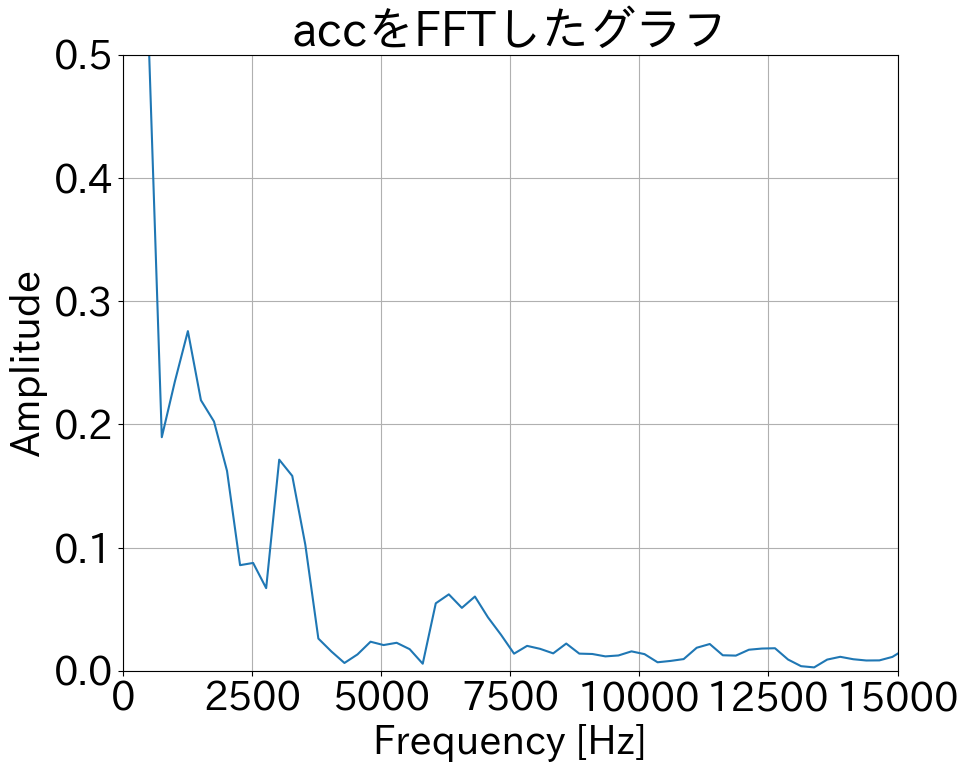

window_data:          time         x         y         z       abs
200  4.273045  1.283292 -1.800440  0.756568  2.336839
201  4.293283 -0.938527 -3.734955 -1.034295  3.987541
202  4.313046  0.201113 -2.068590 -0.737414  2.205287
203  4.333060 -0.651223 -3.112462 -1.666364  3.590026
204  4.353052 -1.714248 -3.715801 -0.890643  4.187967
..        ...       ...       ...       ...       ...
395  8.173051 -2.336741  0.632069 -1.158794  2.683780
396  8.193101 -1.838747  0.622492 -0.153229  1.947297
397  8.213061 -2.135628  0.220267 -1.896208  2.864442
398  8.233053 -6.100426 -1.168370 -0.057461  6.211569
399  8.253063  1.244985 -2.796427  7.891289  8.464185

[200 rows x 5 columns]
サンプリング周波数: 50251.036666700544 Hz
サンプリング間隔: 1.9900086970000004e-05 sec
収録時間: 0.003980017394
データ数: 199
最大周波数: 25125.518333350272 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.259447253036 Hz
最大周波数の振幅: [1.19829373e+00 1.49236251e-01 8.84261009e-02 2.88207057e-01
 2.60180842e-01 1.00482188e-01 2.21720297e-02 1.50244

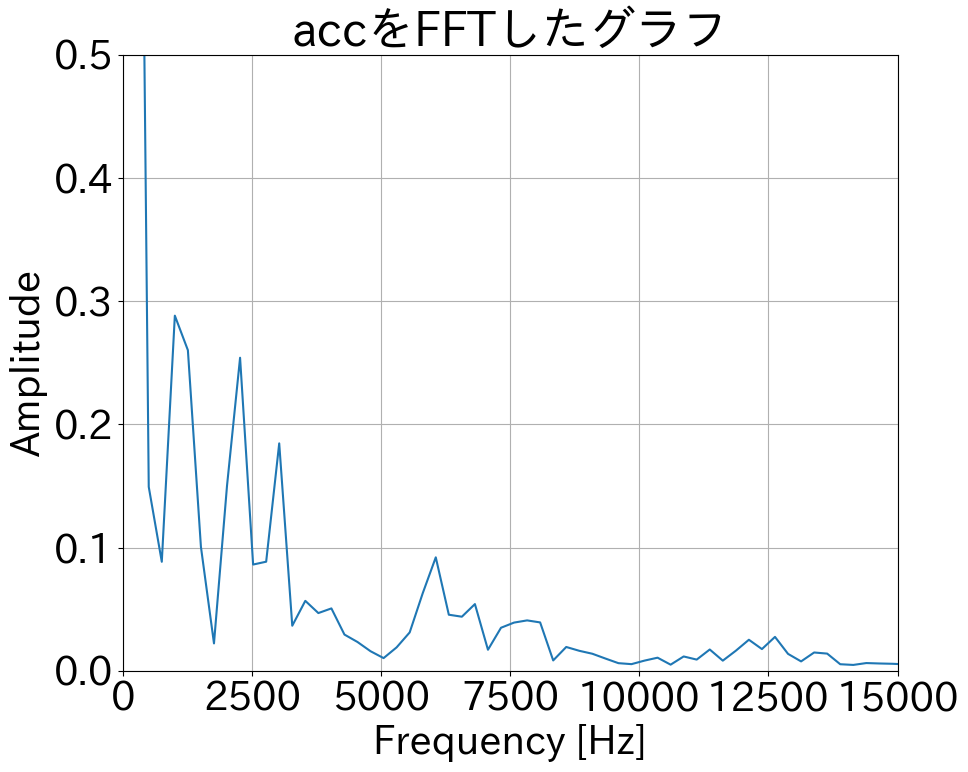

window_data:           time         x         y         z       abs
400   8.273057 -1.053449 -3.102885  2.987964  4.434589
401   8.293078  9.567230 -1.877054 -1.752556  9.905891
402   8.313065  7.316680 -0.641646 -1.790863  7.559941
403   8.333052  3.696647 -0.852336 -1.704672  4.159036
404   8.353053  0.162806 -1.685518  1.398214  2.196014
..         ...       ...       ...       ...       ...
595  12.173053 -0.095768  0.067038 -0.086191  0.145239
596  12.193634 -0.143652  0.191536 -0.038307  0.242465
597  12.213352  0.047884  0.296881 -0.105345  0.318636
598  12.233067  0.287304  0.201113 -0.114922  0.369049
599  12.253072  0.421380  0.067038 -0.153229  0.453358

[200 rows x 5 columns]
サンプリング周波数: 50251.07023881407 Hz
サンプリング間隔: 1.9900073675000002e-05 sec
収録時間: 0.0039800147350000014
データ数: 200
最大周波数: 25125.535119407035 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.535119407035 Hz
最大周波数の振幅: [0.48452869 0.43942945 0.34216546 0.09030959 0.27734413 0.1880962
 0.21899843 0.13298365 0.247

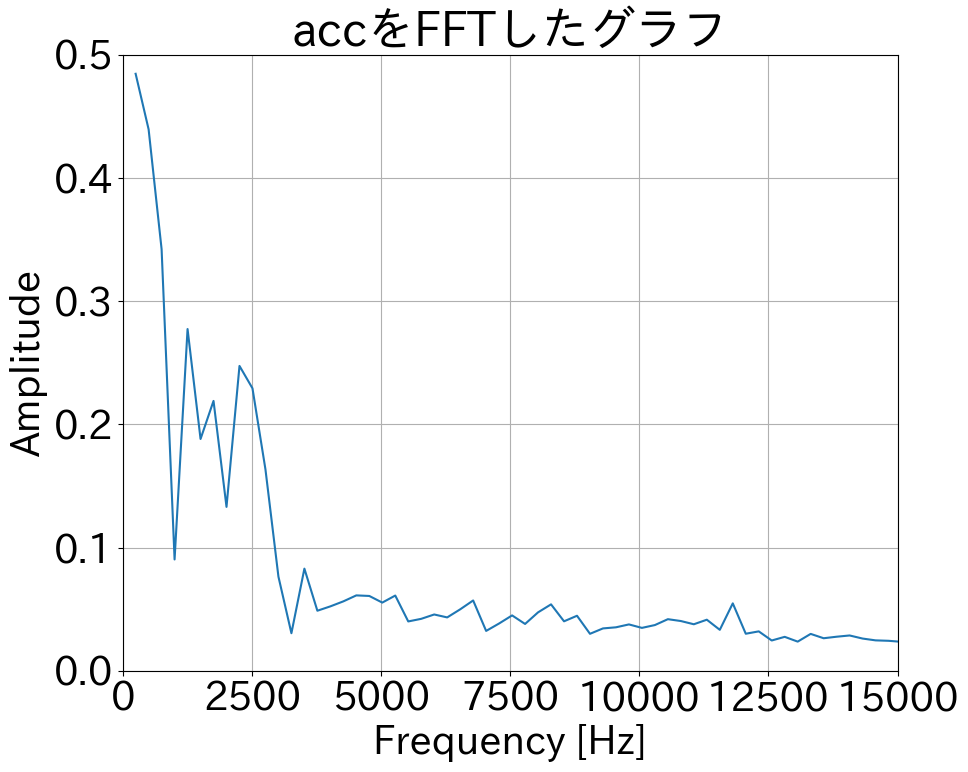

window_data:           time         x         y         z       abs
600  12.273045  0.411803 -0.028730 -0.239420  0.477209
601  12.293064  0.325611 -0.095768 -0.086191  0.350176
602  12.313052  0.162806 -0.067038 -0.057461  0.185207
603  12.333070  0.038307 -0.057461 -0.095768  0.118071
604  12.353054  0.057461  0.086191 -0.028730  0.107499
..         ...       ...       ...       ...       ...
795  16.173095  0.134075  0.086191  0.076614  0.176847
796  16.193056  0.153229  0.114922  0.076614  0.206291
797  16.213062  0.181959  0.124498  0.028730  0.222339
798  16.233083  0.220267  0.134075 -0.038307  0.260693
799  16.253051  0.229843  0.105345 -0.057461  0.259282

[200 rows x 5 columns]
サンプリング周波数: 50251.1728240572 Hz
サンプリング間隔: 1.990003305e-05 sec
収録時間: 0.0039800066100000005
データ数: 200
最大周波数: 25125.5864120286 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.5864120286 Hz
最大周波数の振幅: [3.62555882e-02 8.95316347e-03 2.29605630e-02 2.06643082e-02
 1.65705606e-02 3.02301039e-03 3.20954121e-03

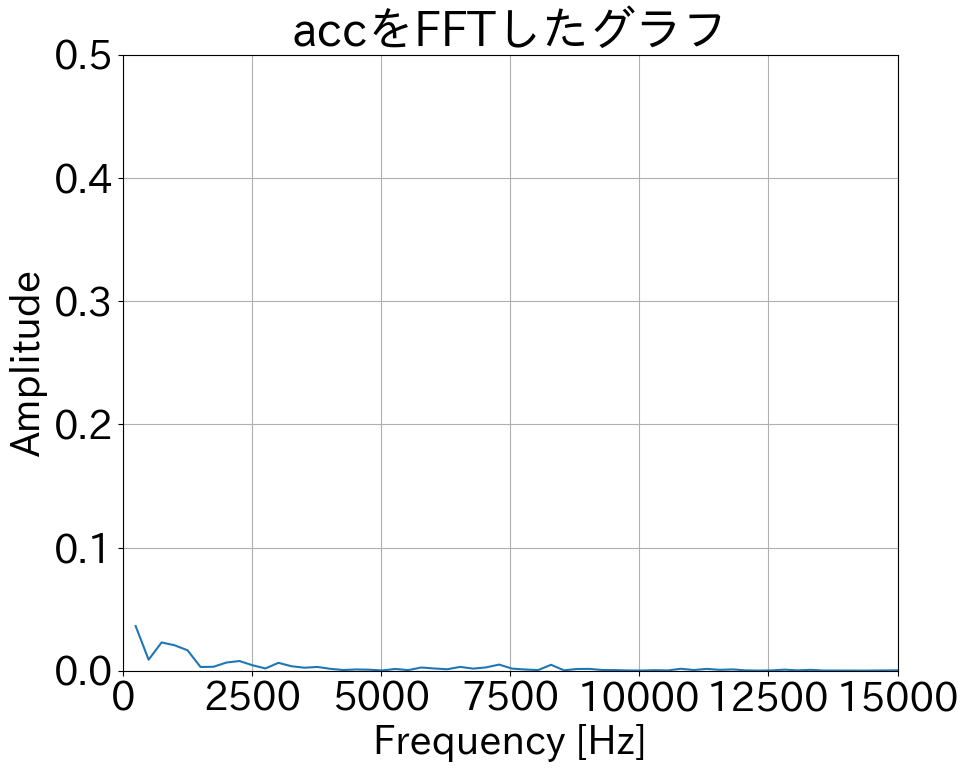

window_data:           time         x         y         z       abs
800  16.273060  0.153229  0.124498 -0.057461  0.205623
801  16.293074  0.220267  0.095768 -0.028730  0.241897
802  16.313048  0.210690  0.124498 -0.067038  0.253740
803  16.333047  0.201113  0.028730 -0.153229  0.254462
804  16.353052  0.172383 -0.009577 -0.057461  0.181959
..         ...       ...       ...       ...       ...
995  20.173051  0.134075 -0.057461 -0.114922  0.185701
996  20.193047  0.172383 -0.047884 -0.134075  0.223573
997  20.213068  0.268151 -0.047884 -0.105345  0.292053
998  20.233058  0.210690 -0.067038 -0.181959  0.286345
999  20.253046  0.105345 -0.028730 -0.019154  0.110860

[200 rows x 5 columns]
サンプリング周波数: 50251.43910573825 Hz
サンプリング間隔: 1.98999276e-05 sec
収録時間: 0.00397998552
データ数: 199
最大周波数: 25125.719552869126 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.459655618528 Hz
最大周波数の振幅: [8.50625502e-03 4.20380535e-02 2.49339697e-02 1.45533763e-02
 1.35278787e-02 7.96533777e-03 3.19917040e-03 1.934

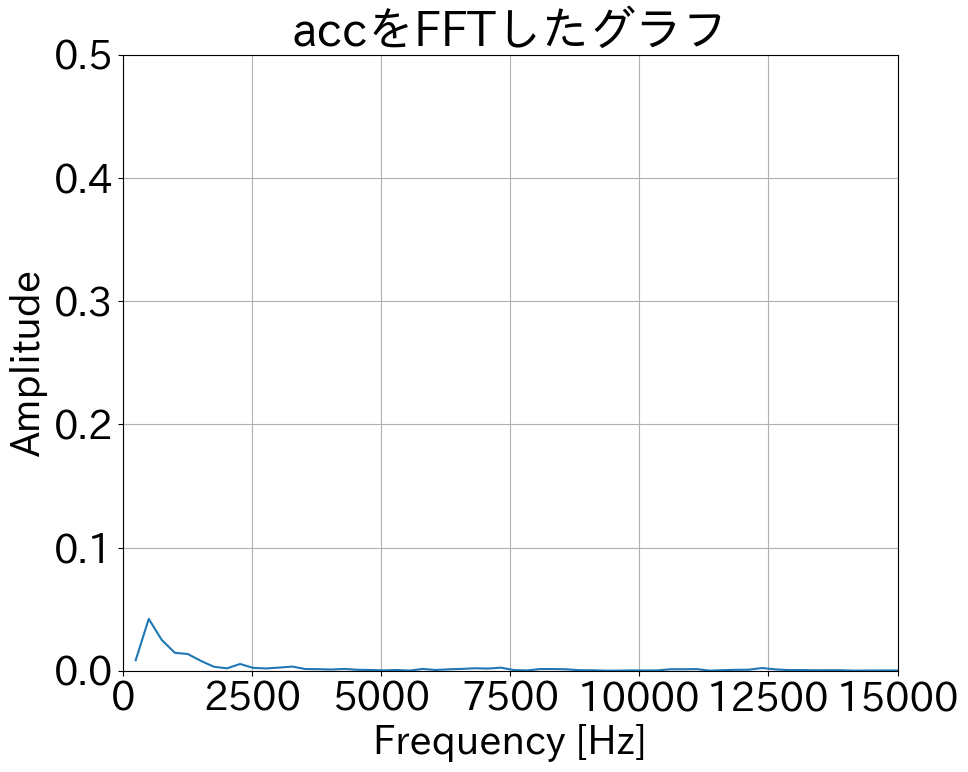

window_data:            time         x         y         z       abs
1000  20.273034  0.105345 -0.028730 -0.019154  0.110860
1001  20.293043  0.134075 -0.019154  0.057461  0.147122
1002  20.313061  0.201113  0.038307  0.038307  0.208282
1003  20.333161  0.172383  0.019154 -0.038307  0.177623
1004  20.353049  0.134075  0.000000  0.057461  0.145870
...         ...       ...       ...       ...       ...
1195  24.173055  0.316035 -0.134075 -0.325611  0.473156
1196  24.193080  0.268151 -0.172383 -0.354342  0.476633
1197  24.213056  0.153229 -0.057461 -0.306458  0.347415
1198  24.233046 -0.009577 -0.067038 -0.201113  0.212208
1199  24.253060 -0.067038 -0.172383 -0.153229  0.240185

[200 rows x 5 columns]
サンプリング周波数: 50250.92485256849 Hz
サンプリング間隔: 1.9900131250000003e-05 sec
収録時間: 0.003980026250000002
データ数: 200
最大周波数: 25125.462426284244 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.462426284244 Hz
最大周波数の振幅: [0.01363917 0.05838557 0.02765902 0.02539481 0.01859138 0.00252746
 0.02825948 0.00

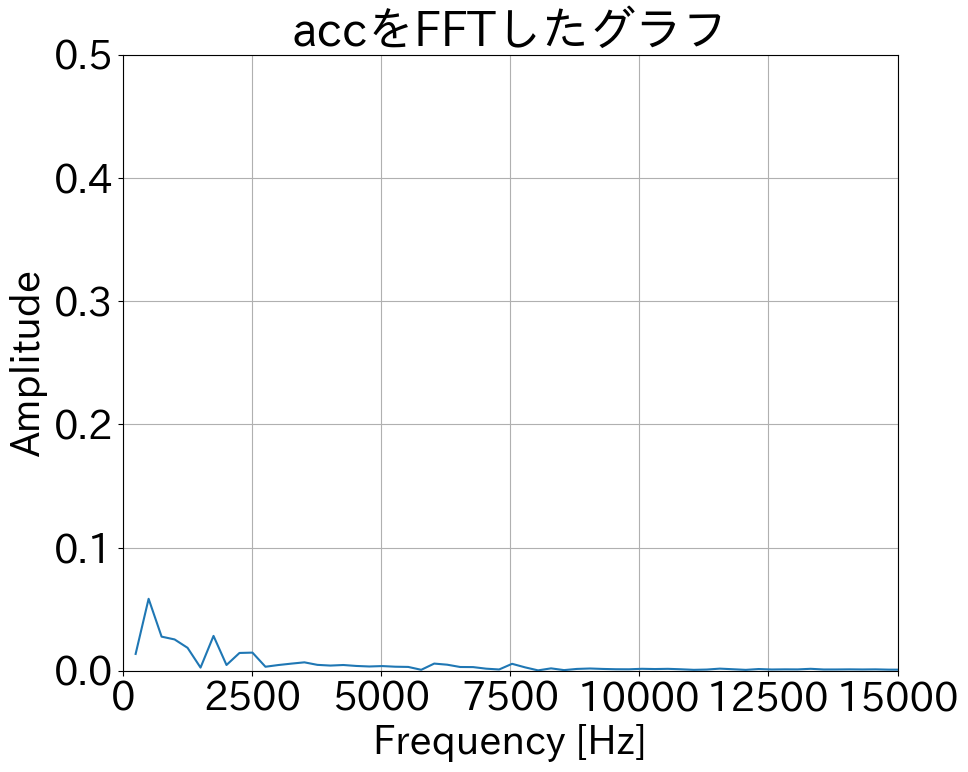

window_data:            time         x         y         z       abs
1200  24.273105  0.047884 -0.296881 -0.181959  0.351483
1201  24.293073  0.172383 -0.287304 -0.239420  0.411803
1202  24.313071  0.287304 -0.258574 -0.316035  0.499281
1203  24.333331  0.296881 -0.124498 -0.248997  0.406986
1204  24.353049  0.268151  0.019154 -0.258574  0.373004
...         ...       ...       ...       ...       ...
1395  28.173050  0.105345 -0.105345 -0.057461  0.159677
1396  28.193058  0.143652 -0.028730 -0.191536  0.241138
1397  28.213061  0.220267 -0.028730 -0.172383  0.281173
1398  28.233052  0.201113  0.000000 -0.047884  0.206735
1399  28.253056  0.181959 -0.047884 -0.114922  0.220475

[200 rows x 5 columns]
サンプリング周波数: 50251.88304107389 Hz
サンプリング間隔: 1.9899751800000008e-05 sec
収録時間: 0.00397995036
データ数: 199
最大周波数: 25125.941520536944 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.680507870933 Hz
最大周波数の振幅: [0.02250341 0.03298855 0.06598382 0.03991555 0.02035562 0.00443311
 0.00743871 0.01163472 0.

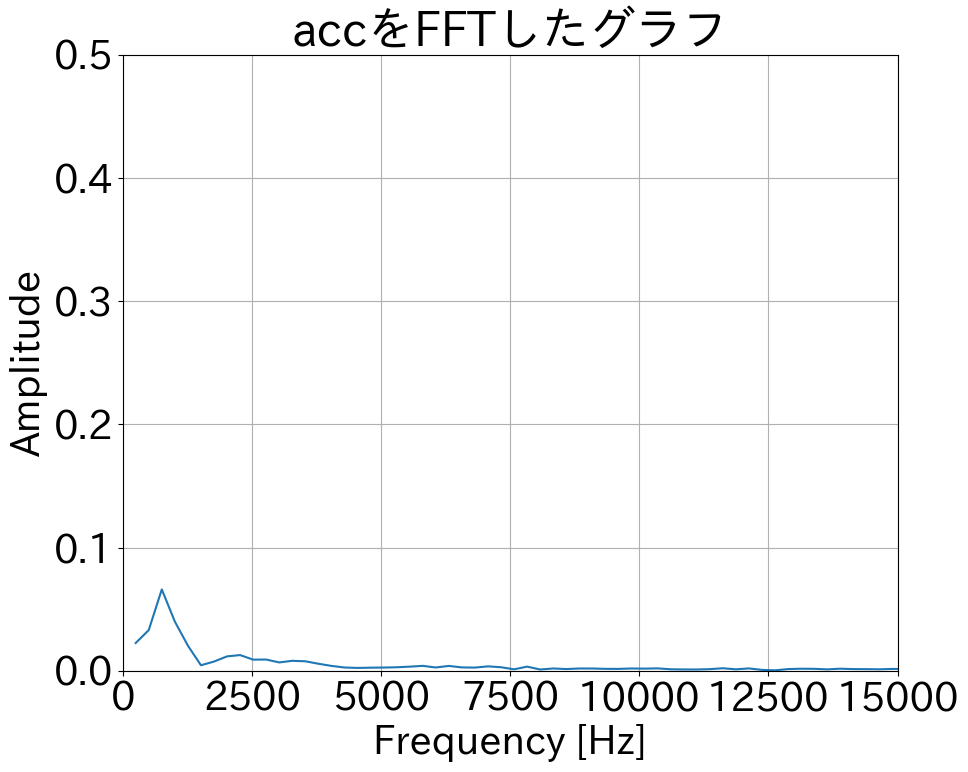

window_data:            time         x         y         z       abs
1400  28.273044  0.153229 -0.076614 -0.143652  0.223573
1401  28.293071  0.134075 -0.076614 -0.076614  0.172383
1402  28.313066  0.153229 -0.067038 -0.153229  0.226831
1403  28.333071  0.268151 -0.038307 -0.134075  0.302239
1404  28.353055  0.277727  0.000000 -0.172383  0.326876
...         ...       ...       ...       ...       ...
1595  32.173060 -1.206678 -2.221819 -1.331176  2.857373
1596  32.193111 -1.867477  0.038307  0.469264  1.925915
1597  32.213060 -2.710236  1.877054  0.900220  3.417471
1598  32.233038 -3.438074  3.026271  0.545878  4.612662
1599  32.253085 -3.342306  3.256114 -0.057461  4.666539

[200 rows x 5 columns]
サンプリング周波数: 50250.747334767504 Hz
サンプリング間隔: 1.9900201550000027e-05 sec
収録時間: 0.003980040310000003
データ数: 199
最大周波数: 25125.373667383752 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.115508251172 Hz
最大周波数の振幅: [2.18433372 0.79926821 0.4423071  0.2290282  0.11366856 0.79015929
 1.21019414 0.597

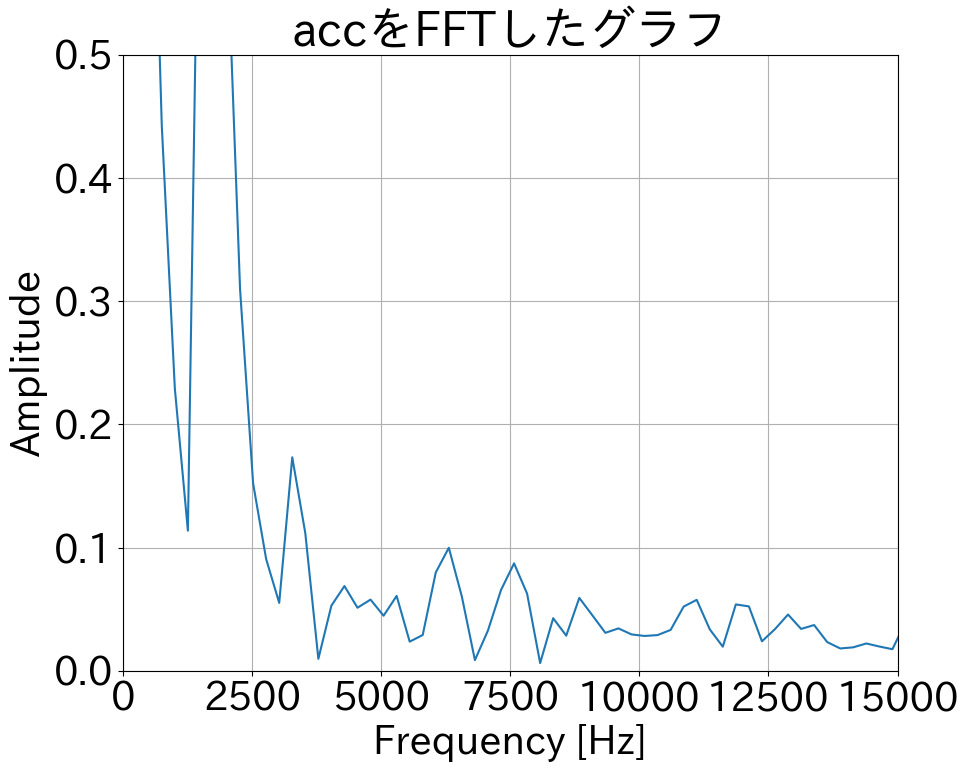

window_data:            time         x         y         z       abs
1600  32.273088 -2.087744  2.671929 -0.555455  3.436046
1601  32.293063 -1.589750  1.599327 -1.522712  2.720993
1602  32.313043 -1.436521  0.871489 -1.704672  2.393531
1603  32.333046 -0.641646 -0.239420 -0.421380  0.804110
1604  32.353103  0.306458 -1.177947 -0.210690  1.235260
...         ...       ...       ...       ...       ...
1795  36.173052 -2.279280 -1.302446  0.344765  2.647706
1796  36.193453 -3.687071  0.306458  1.541866  4.008211
1797  36.213056 -4.213795  3.189077  0.363919  5.297048
1798  36.233059 -2.624045  2.681506 -0.852336  3.847410
1799  36.253056 -1.503559  1.426944 -1.034295  2.316598

[200 rows x 5 columns]
サンプリング周波数: 50251.65488561423 Hz
サンプリング間隔: 1.9899842150000008e-05 sec
収録時間: 0.0039799684299999995
データ数: 199
最大周波数: 25125.827442807116 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.567003396023 Hz
最大周波数の振幅: [0.27556421 0.44921152 0.57680399 0.96131824 0.10293431 0.28346891
 0.6637253  1.673

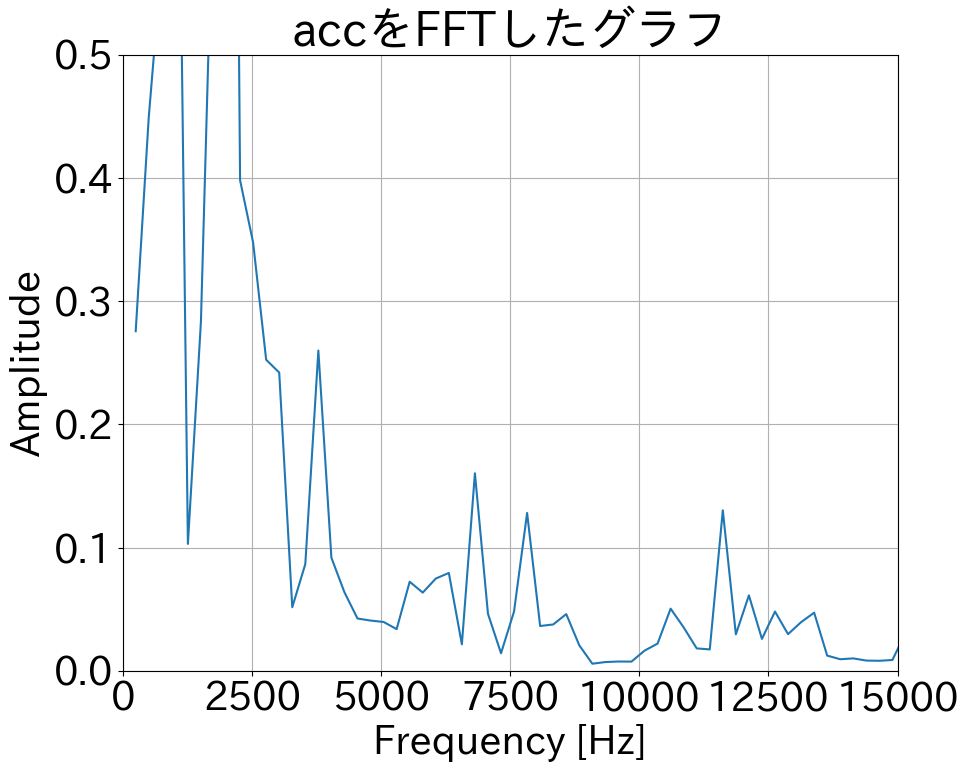

window_data:            time         x         y         z       abs
1800  36.273422 -0.814029  0.181959 -1.158794  1.427779
1801  36.293175 -0.545878 -0.593762 -1.810017  1.981589
1802  36.313065  1.072602 -1.139640 -1.350330  2.067038
1803  36.333065  1.436521 -0.335188 -1.733402  2.276099
1804  36.353059  0.995988  0.363919  0.172383  1.074311
...         ...       ...       ...       ...       ...
1995  40.173082 -0.478840 -4.299986  0.239420  4.333185
1996  40.193064 -1.417367 -2.126051 -1.522712  2.974504
1997  40.213267 -2.355895 -1.417367  0.632069  2.821113
1998  40.233063 -3.160346 -0.727837  1.513135  3.578703
1999  40.253075 -3.428497  0.306458  0.967257  3.575485

[200 rows x 5 columns]
サンプリング周波数: 50255.6429171732 Hz
サンプリング間隔: 1.9898263000000008e-05 sec
収録時間: 0.003979652600000001
データ数: 199
最大周波数: 25127.8214585866 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 25001.55099899571 Hz
最大周波数の振幅: [0.30188723 0.13196381 0.33382886 0.95023243 0.28402102 0.57223478
 1.32196112 1.45120471

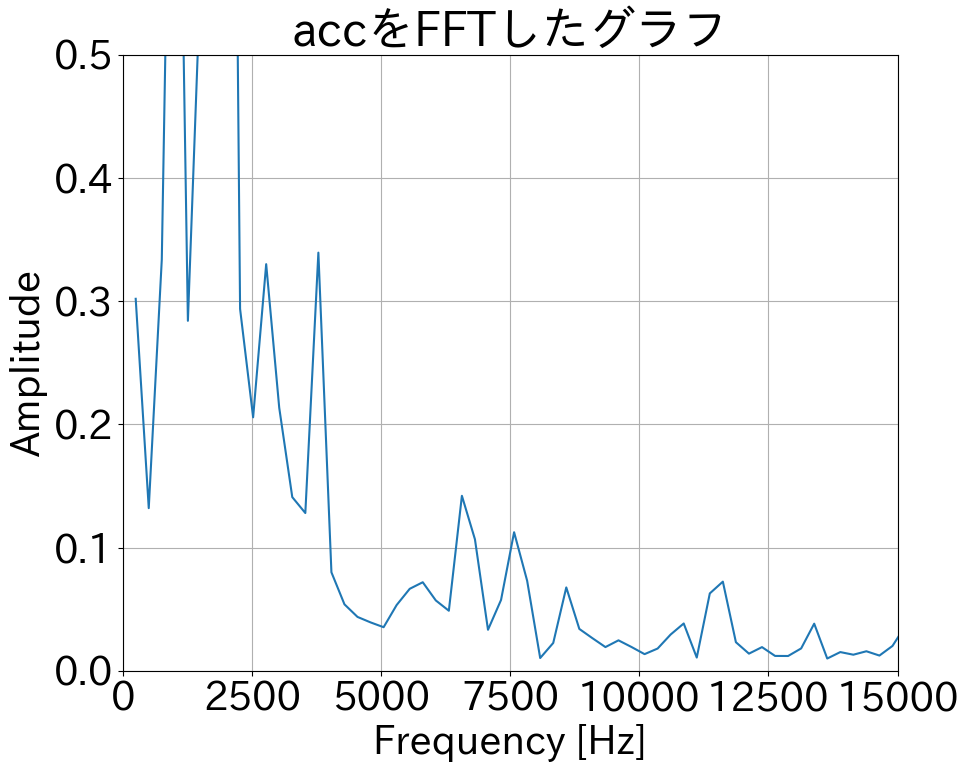

window_data:            time         x         y         z       abs
2000  40.273070 -3.198653  1.110910 -0.268151  3.396676
2001  40.293068 -2.413355  1.532289 -0.526724  2.906825
2002  40.313063 -1.331176  1.608904 -0.660800  2.190264
2003  40.333069 -0.383072  1.149217 -2.087744  2.413735
2004  40.353062  0.785298  0.756568 -2.193089  2.449230
...         ...       ...       ...       ...       ...
2195  44.173067 -0.153229 -4.232949  2.442086  4.889286
2196  44.193054  0.000000 -3.869030  1.800440  4.267432
2197  44.213052 -0.804452 -1.685518 -1.273715  2.260634
2198  44.233061 -1.474828 -1.197101 -0.201113  1.910135
2199  44.253393 -2.365471 -0.938527  1.264138  2.841537

[200 rows x 5 columns]
サンプリング周波数: 50247.18474445222 Hz
サンプリング間隔: 1.9901612500000007e-05 sec
収録時間: 0.003980322499999999
データ数: 199
最大周波数: 25123.59237222611 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24997.343164325477 Hz
最大周波数の振幅: [0.0448259  0.32517051 0.6624867  1.09891819 0.30716732 0.68338599
 1.21283921 1.76637

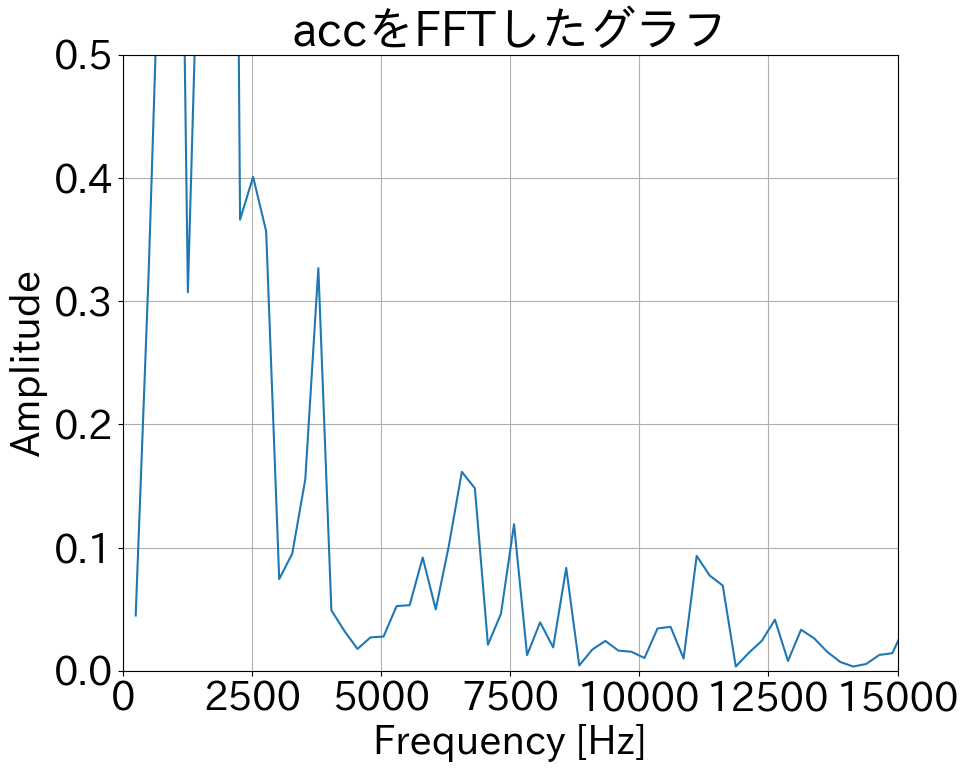

window_data:            time         x         y         z       abs
2200  44.273312 -2.767697 -0.229843  1.149217  3.005607
2201  44.293061 -2.911349  1.292869  0.756568  3.274120
2202  44.313068 -2.317587  2.097321  0.009577  3.125709
2203  44.333058 -1.771709  1.781286 -0.459687  2.554065
2204  44.353049 -1.484405  1.283292 -0.948104  2.179265
...         ...       ...       ...       ...       ...
2395  48.173073 -1.905785  2.796427  0.105345  3.385723
2396  48.193049 -1.877054 -1.149217  1.254562  2.533369
2397  48.213044 -1.369483 -3.725378  3.227384  5.115655
2398  48.233136 -0.871489 -4.395754  2.604892  5.183398
2399  48.253061 -0.430956 -2.844312 -0.967257  3.035032

[200 rows x 5 columns]
サンプリング周波数: 50254.41700644853 Hz
サンプリング間隔: 1.989874839999999e-05 sec
収録時間: 0.003979749679999998
データ数: 199
最大周波数: 25127.208503224265 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 25000.941123811073 Hz
最大周波数の振幅: [2.34847968e-01 1.57428351e-01 2.88432139e-01 6.37202274e-01
 3.16304826e-01 2.5423622

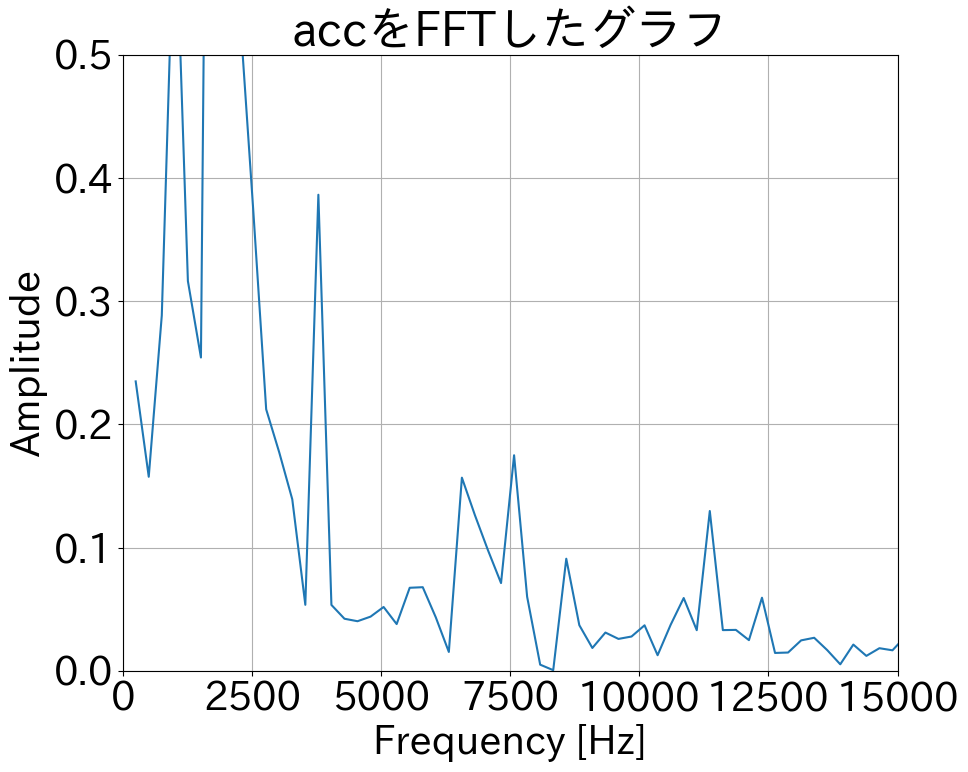

window_data:            time         x         y         z       abs
2400  48.273077 -0.536301 -1.647211 -1.675941  2.410332
2401  48.293059 -2.154782 -0.976834  1.493982  2.798083
2402  48.313317 -2.624045  0.201113  1.790863  3.183276
2403  48.333159 -2.738967  1.455675  0.718261  3.183838
2404  48.353072 -2.365471  1.857900 -0.105345  3.009709
...         ...       ...       ...       ...       ...
2595  52.173061 -0.641646  6.081272  0.287304  6.121775
2596  52.193099 -1.388637  2.279280 -0.229843  2.678854
2597  52.213065 -1.704672 -0.976834  0.469264  2.019980
2598  52.233058 -1.867477 -4.242526  2.959233  5.499414
2599  52.253054 -1.120486 -5.363012  2.853889  6.177545

[200 rows x 5 columns]
サンプリング周波数: 50251.546932314064 Hz
サンプリング間隔: 1.989988490000004e-05 sec
収録時間: 0.0039799769800000035
データ数: 199
最大周波数: 25125.773466157032 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.51329798539 Hz
最大周波数の振幅: [0.08880073 0.18823482 0.20652229 0.84310128 0.16705885 0.40159294
 1.41930751 1.6364

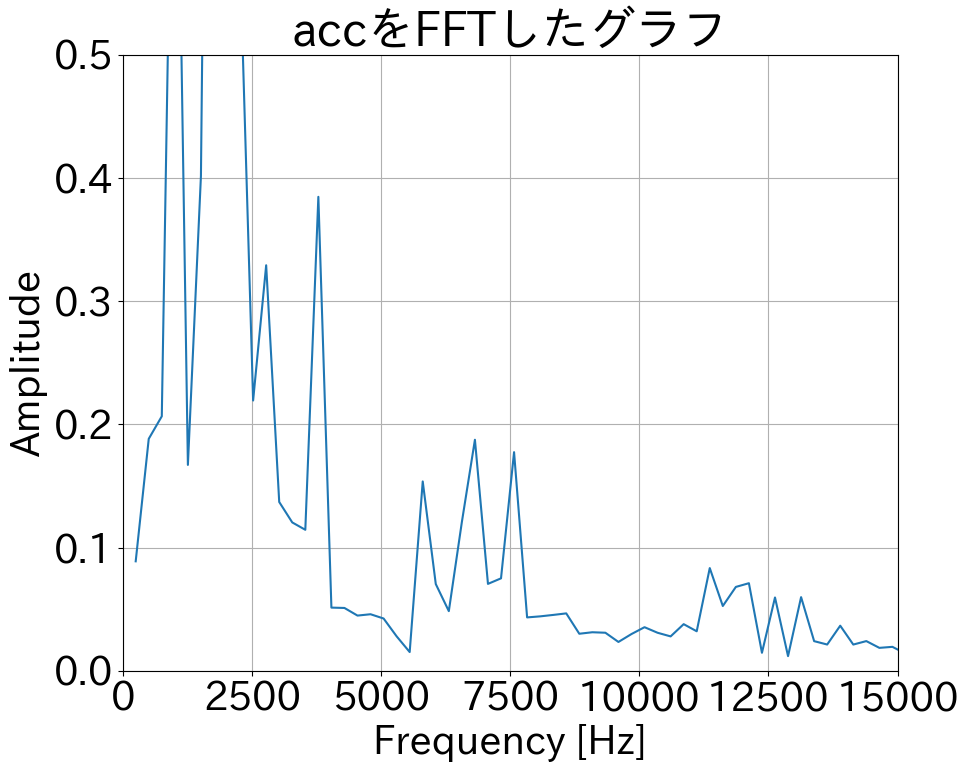

window_data:            time         x         y         z       abs
2600  52.273109 -1.379060 -3.313575 -0.814029  3.680249
2601  52.293057 -1.915361 -1.608904 -0.383072  2.530598
2602  52.313063 -2.394202 -0.574608  1.991976  3.167072
2603  52.333070 -2.671929  0.727837  1.982399  3.405710
2604  52.353057 -2.097321  2.173935  0.593762  3.078523
...         ...       ...       ...       ...       ...
2795  56.173080 -0.823605  7.163452  3.974375  8.233409
2796  56.193058 -1.455675  7.920019  1.369483  8.168303
2797  56.213060 -1.944092  4.970363  0.009577  5.337049
2798  56.233083 -2.576161  0.746991 -0.354342  2.705579
2799  56.253070 -1.561020 -3.035848  2.135628  4.026669

[200 rows x 5 columns]
サンプリング周波数: 50251.75273842154 Hz
サンプリング間隔: 1.9899803399999993e-05 sec
収録時間: 0.0039799606799999976
データ数: 199
最大周波数: 25125.87636921077 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.615683938355 Hz
最大周波数の振幅: [0.32561652 0.13079995 0.19100393 0.82342105 0.33752253 0.26789575
 1.17977835 1.6792

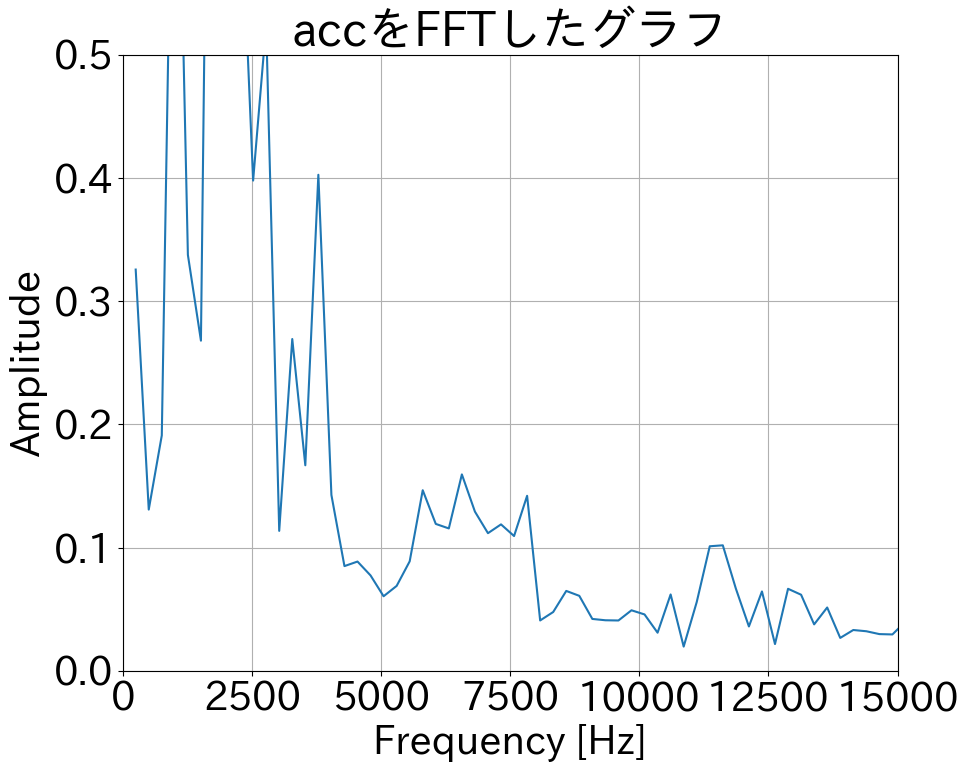

window_data:            time         x         y         z       abs
2800  56.273058 -0.143652 -4.568137 -0.124498  4.572090
2801  56.293055 -0.143652 -4.568137 -0.124498  4.572090
2802  56.313055 -0.248997 -2.183512  1.177947  2.493448
2803  56.333059 -2.815581 -0.134075  1.848324  3.370723
2804  56.353073 -3.256114  1.302446  1.398214  3.775400
...         ...       ...       ...       ...       ...
2995  60.173059  1.130063  4.261679  5.908890  7.372512
2996  60.193069  1.101333  6.378153  4.137180  7.681799
2997  60.213072  0.545878  6.876147  0.708684  6.934091
2998  60.233064 -1.369483  3.112462 -0.469264  3.432654
2999  60.253034 -1.762132 -0.296881  0.402226  1.831675

[200 rows x 5 columns]
サンプリング周波数: 50251.56473510721 Hz
サンプリング間隔: 1.9899877849999978e-05 sec
収録時間: 0.0039799755700000005
データ数: 200
最大周波数: 25125.782367553606 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.78236755361 Hz
最大周波数の振幅: [0.27322406 0.18987094 0.45702016 1.23299761 0.54998719 0.55695057
 1.4576488  1.84

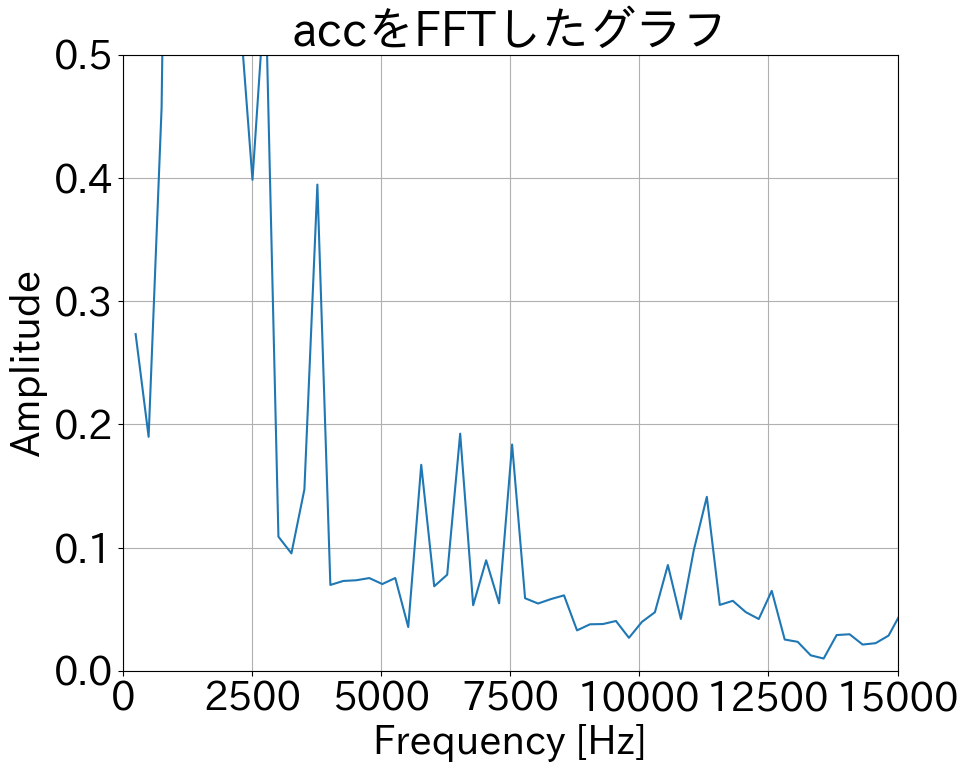

window_data:            time         x         y         z       abs
3000  60.273095 -0.670376 -3.878607  2.959233  4.924435
3001  60.293089 -0.220267 -5.784391  2.987964  6.514263
3002  60.313059 -0.344765 -4.165911 -1.714248  4.518000
3003  60.333045 -1.398214 -2.260126 -0.928950  2.815337
3004  60.353058 -2.968810 -0.986411  1.877054  3.648311
...         ...       ...       ...       ...       ...
3195  64.173040  4.050989 -3.543418  7.105990  8.914114
3196  64.193056  1.503559  1.733402  5.075707  5.570294
3197  64.213040  0.641646  4.893748  5.018247  7.038699
3198  64.233036  0.679953  7.019799  4.060566  8.138066
3199  64.253051 -0.459687  5.717354  0.517148  5.759070

[200 rows x 5 columns]
サンプリング周波数: 50251.80677858685 Hz
サンプリング間隔: 1.989978199999999e-05 sec
収録時間: 0.003979956399999999
データ数: 200
最大周波数: 25125.903389293424 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.90338929342 Hz
最大周波数の振幅: [0.2431113  0.39254019 0.20620883 0.82378374 0.55306902 0.54046329
 1.47921114 1.6415

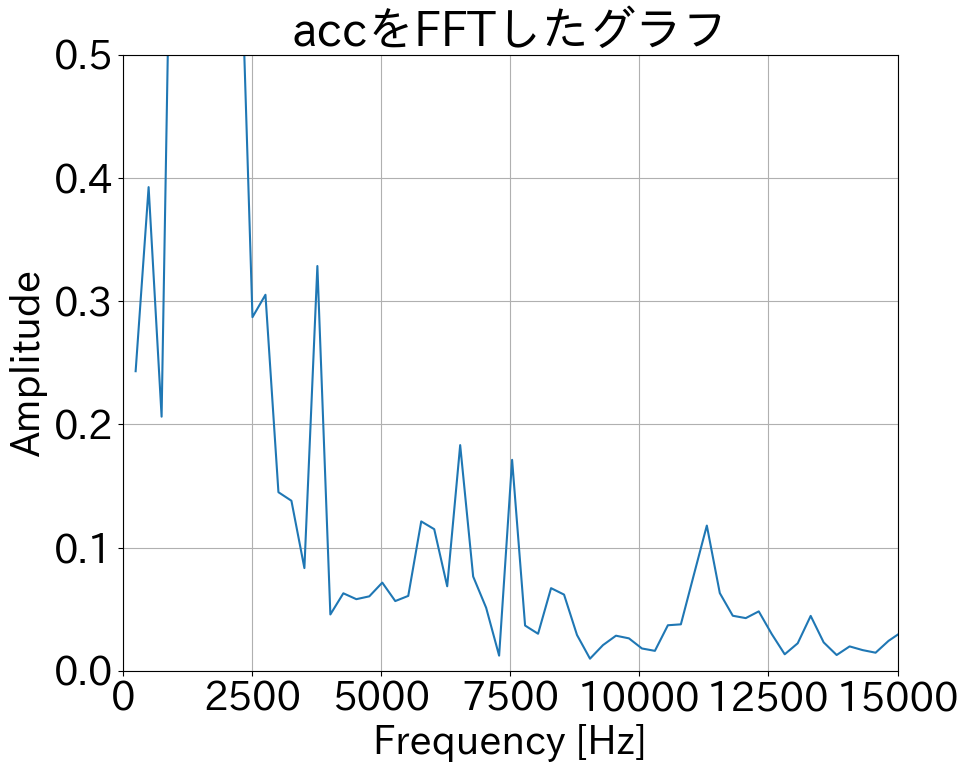

window_data:            time          x         y          z         abs
3200  64.273044  -1.369483  1.589750   0.354342    2.127991
3201  64.293045  -0.459687 -2.499547   1.991976    3.229088
3202  64.313044   0.287304 -5.248090   3.495534    6.312191
3203  64.333049   0.565032 -4.060566   0.727837    4.163797
3204  64.353037   0.201113 -1.982399  -1.340753    2.401660
...         ...        ...       ...        ...         ...
3395  68.173113  -6.588843 -0.143652  12.919112   14.502998
3396  68.193064  -8.877700 -1.312023   8.820239   12.582988
3397  68.213080  -7.977480 -4.060566  10.496181   13.794861
3398  68.233066  21.691467 -3.361459  44.503422   49.622311
3399  68.253064  69.498886 -9.634268 -78.453201  105.251219

[200 rows x 5 columns]
サンプリング周波数: 50250.99984979727 Hz
サンプリング間隔: 1.9900101549999993e-05 sec
収録時間: 0.00398002031
データ数: 200
最大周波数: 25125.499924898635 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.499924898635 Hz
最大周波数の振幅: [4.43208222 2.41863543 0.57211847 1.222631

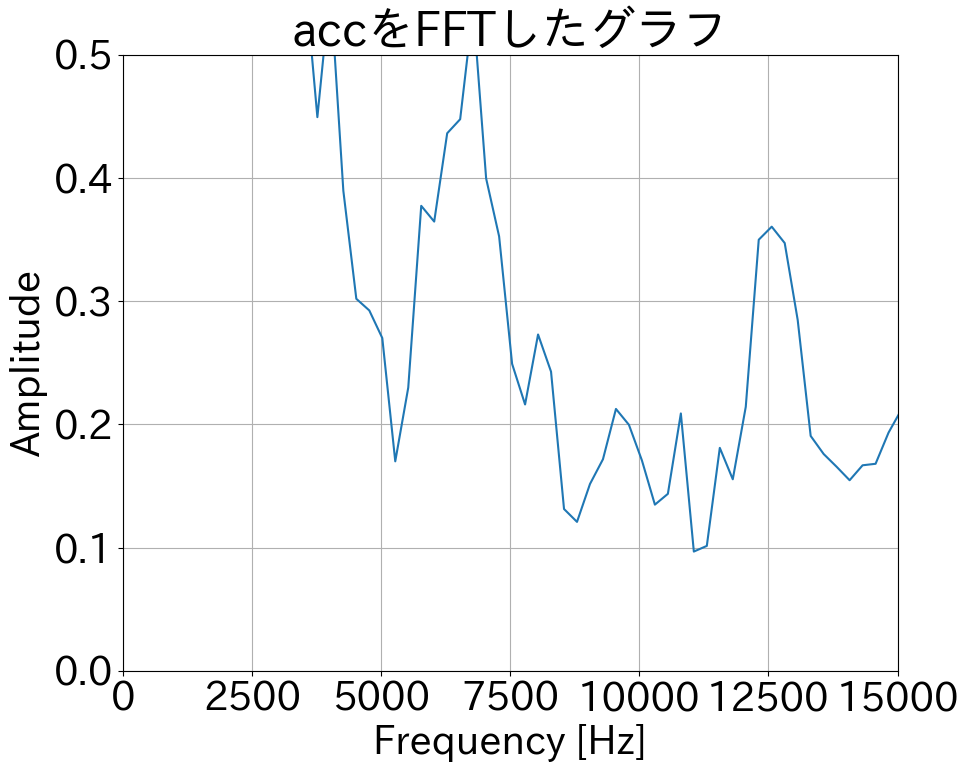

window_data:            time          x         y          z         abs
3400  68.273054   9.557653 -0.316035  -8.485051   12.784550
3401  68.293057  -0.009577  5.114015  -0.478840    5.136392
3402  68.313064  -4.558560  4.175488   0.986411    6.260046
3403  68.333053  -5.975927  3.256114   2.461239    7.236829
3404  68.353053  -6.157887  2.681506   2.518700    7.173137
...         ...        ...       ...        ...         ...
3595  72.173069   6.071695  1.455675  12.363658   13.850795
3596  72.193048  21.088129  4.242526  10.295067   23.847361
3597  72.213084  70.427834  1.896208 -73.367920  101.717879
3598  72.233057  -1.589750  0.718261   4.424485    4.755972
3599  72.253079 -10.477027 -2.451663   5.343858   12.013974

[200 rows x 5 columns]
サンプリング周波数: 50250.9472002042 Hz
サンプリング間隔: 1.9900122399999982e-05 sec
収録時間: 0.003980024479999998
データ数: 200
最大周波数: 25125.4736001021 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.473600102097 Hz
最大周波数の振幅: [2.05655519 0.29760348 0.5425742  1.53

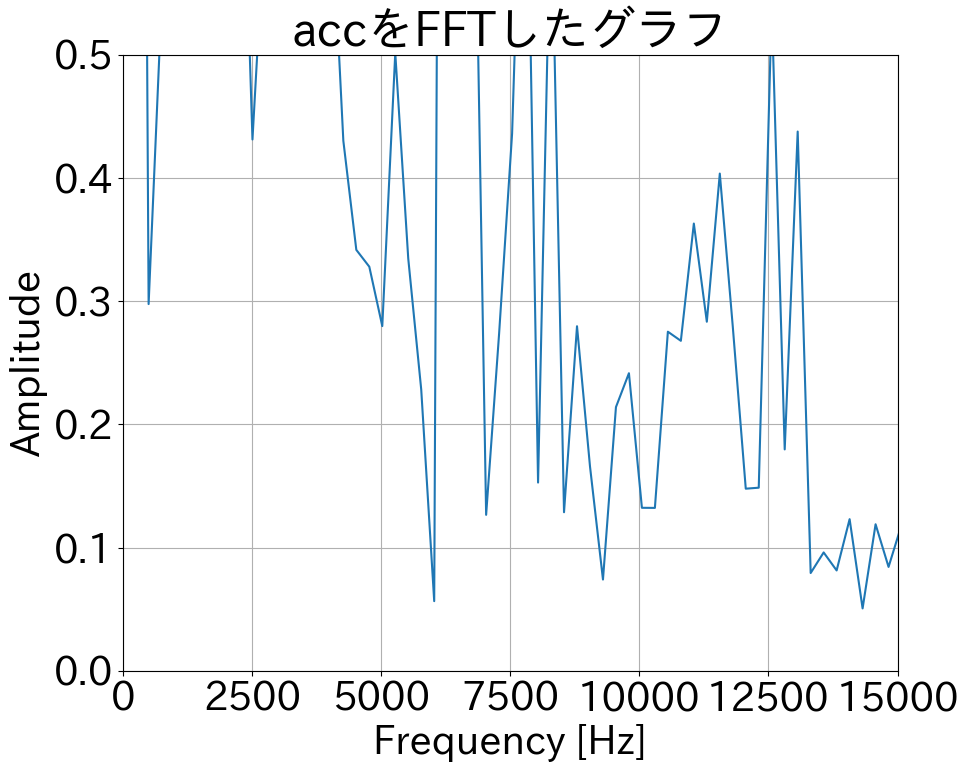

window_data:            time          x          y          z        abs
3600  72.273068 -10.103531  -1.015141   1.608904  10.281071
3601  72.293047  -8.523358   0.785298   1.072602   8.626402
3602  72.313028  -7.718906   2.078167   2.652776   8.422441
3603  72.333083  -3.830723   4.194642   6.493075   8.627252
3604  72.353057   2.633622   4.778827   4.060566   6.801569
...         ...        ...        ...        ...        ...
3795  76.173051  61.530983 -16.529568 -32.972946  71.739136
3796  76.193059  14.326903  -0.871489   9.797073  17.378213
3797  76.213056   2.777274   3.026271   9.241618  10.113312
3798  76.233053  -1.206678   1.886631  10.113108  10.358108
3799  76.253054  -1.800440   0.392649  10.927136  11.081429

[200 rows x 5 columns]
サンプリング周波数: 50251.43178263847 Hz
サンプリング間隔: 1.9899930500000067e-05 sec
収録時間: 0.003979986100000005
データ数: 199
最大周波数: 25125.715891319236 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.45601246838 Hz
最大周波数の振幅: [1.24987201 0.90615658 1.064519   0.36

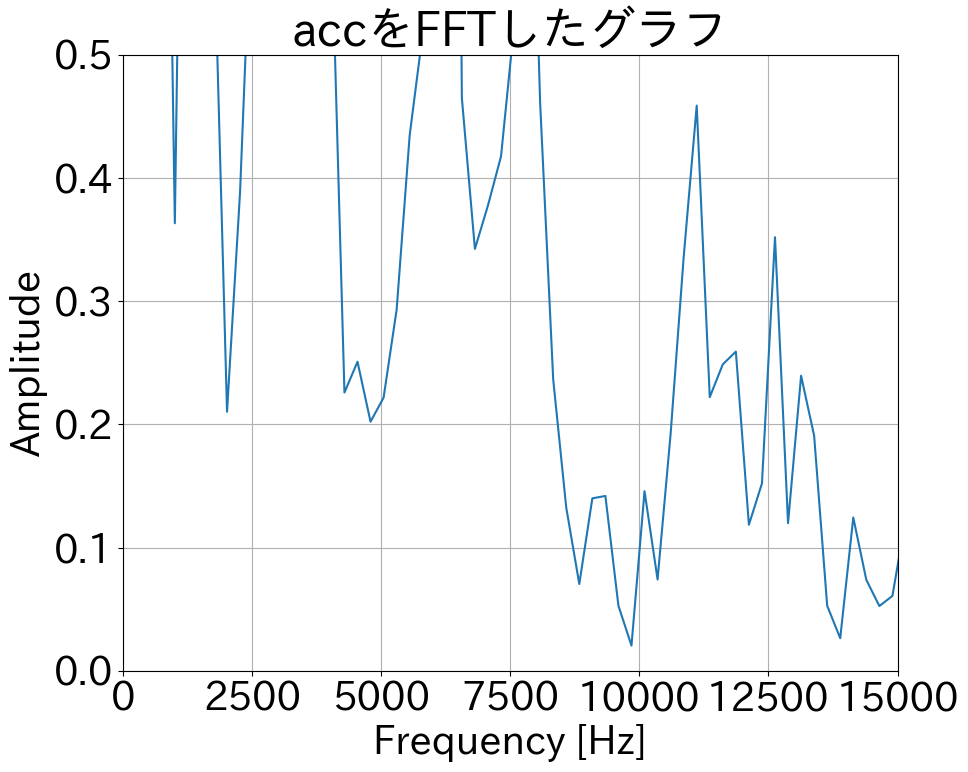

window_data:            time          x          y          z        abs
3800  76.273069  -0.296881  -1.723825  10.563218  10.707067
3801  76.293097  -1.608904  -3.667917  13.014880  13.617242
3802  76.313062  -0.986411  -3.064578  18.301277  18.582287
3803  76.333048   3.055001  -2.987964  24.861391  25.225973
3804  76.353086   4.951209 -13.148955  28.787882  32.033602
...         ...        ...        ...        ...        ...
3995  80.173054  27.159824  -0.967257  40.787621  49.012464
3996  80.193062  13.991714   0.948104  14.374787  20.082368
3997  80.213055  12.124237   0.823605   9.088389  15.174791
3998  80.233070  12.315774   0.248997   9.730036  15.697576
3999  80.253071  30.923510   1.321599  17.420212  35.517233

[200 rows x 5 columns]
サンプリング周波数: 50251.236584942424 Hz
サンプリング間隔: 1.9900007800000008e-05 sec
収録時間: 0.003980001560000005
データ数: 200
最大周波数: 25125.618292471212 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.618292471212 Hz
最大周波数の振幅: [1.05716167 1.01897663 0.508888   

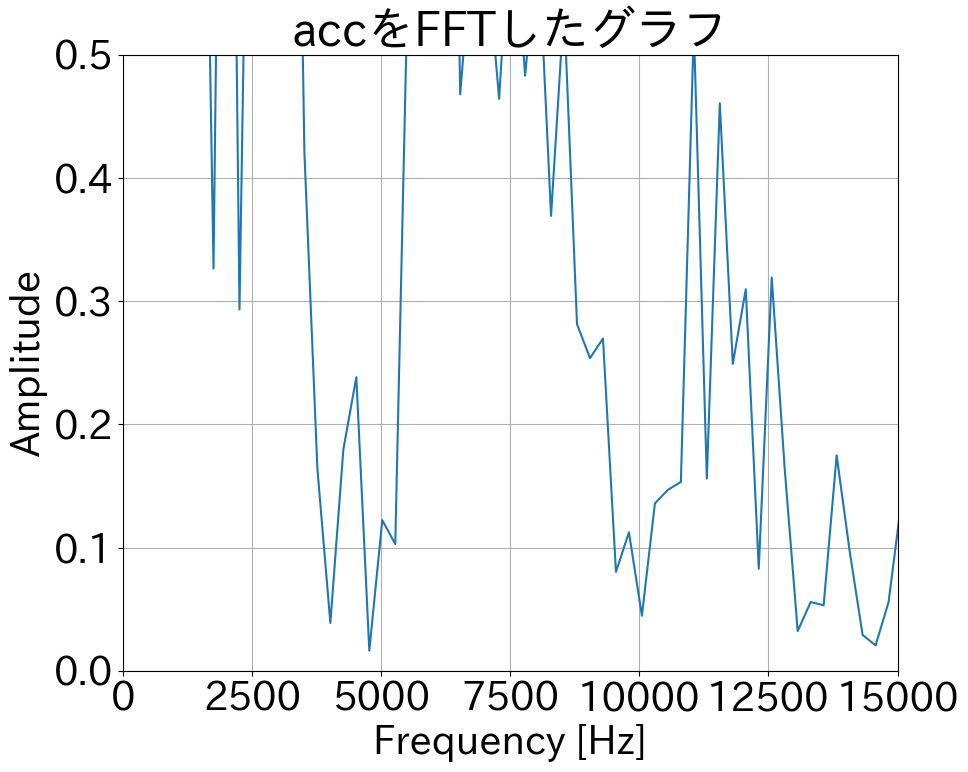

window_data:            time          x          y          z        abs
4000  80.273079  78.453201 -11.166556 -47.386040  92.331108
4001  80.293054  45.422794   3.974375  -0.009577  45.596337
4002  80.313053  14.202404   8.159439   7.326257  17.943210
4003  80.333077   2.547431   6.071695   6.924031   9.554951
4004  80.353100   0.430956   5.315128   9.758766  11.120694
...         ...        ...        ...        ...        ...
4195  84.173057  21.203051   6.406884   0.737414  22.162159
4196  84.193041  18.502390  10.697293  -1.589750  21.431235
4197  84.213050  13.340492  12.756307   4.759673  19.061652
4198  84.233047   9.835381  13.589489   6.387730  17.950265
4199  84.253048   7.460332  15.275007   3.667917  17.390688

[200 rows x 5 columns]
サンプリング周波数: 50251.64895132734 Hz
サンプリング間隔: 1.9899844499999956e-05 sec
収録時間: 0.003979968899999989
データ数: 199
最大周波数: 25125.82447566367 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.56405116285 Hz
最大周波数の振幅: [1.12162277 0.41642601 0.66321592 0.112

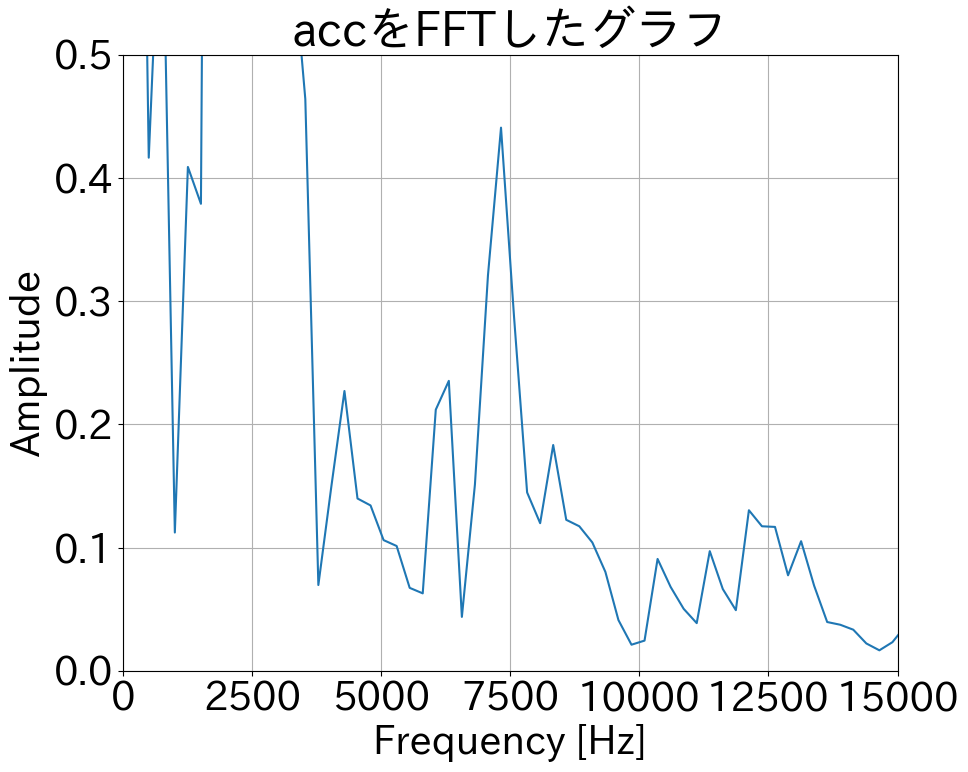

window_data:            time          x          y         z        abs
4200  84.273048   9.500193  13.809755 -3.208230  17.066216
4201  84.293046  10.955867   9.500193 -0.976834  14.534059
4202  84.313056  12.334928   5.736507  0.976834  13.638628
4203  84.333040  15.188815   3.888184 -1.264138  15.729467
4204  84.353038  14.844050   5.726931 -4.003105  16.406353
...         ...        ...        ...       ...        ...
4395  88.173051   9.672575  14.614207 -8.111555  19.311424
4396  88.193051   5.899313  14.757859 -2.442086  16.079804
4397  88.213052   7.402872  12.009315 -1.513135  14.188578
4398  88.233049   7.441179  10.544065 -1.388637  12.979859
4399  88.253082   7.163452   9.509769 -1.695095  12.025976

[200 rows x 5 columns]
サンプリング周波数: 50250.81778620562 Hz
サンプリング間隔: 1.990017364999999e-05 sec
収録時間: 0.00398003473
データ数: 200
最大周波数: 25125.40889310281 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.40889310281 Hz
最大周波数の振幅: [0.06190459 0.13226905 0.10183867 0.18319485 0.09272544 0

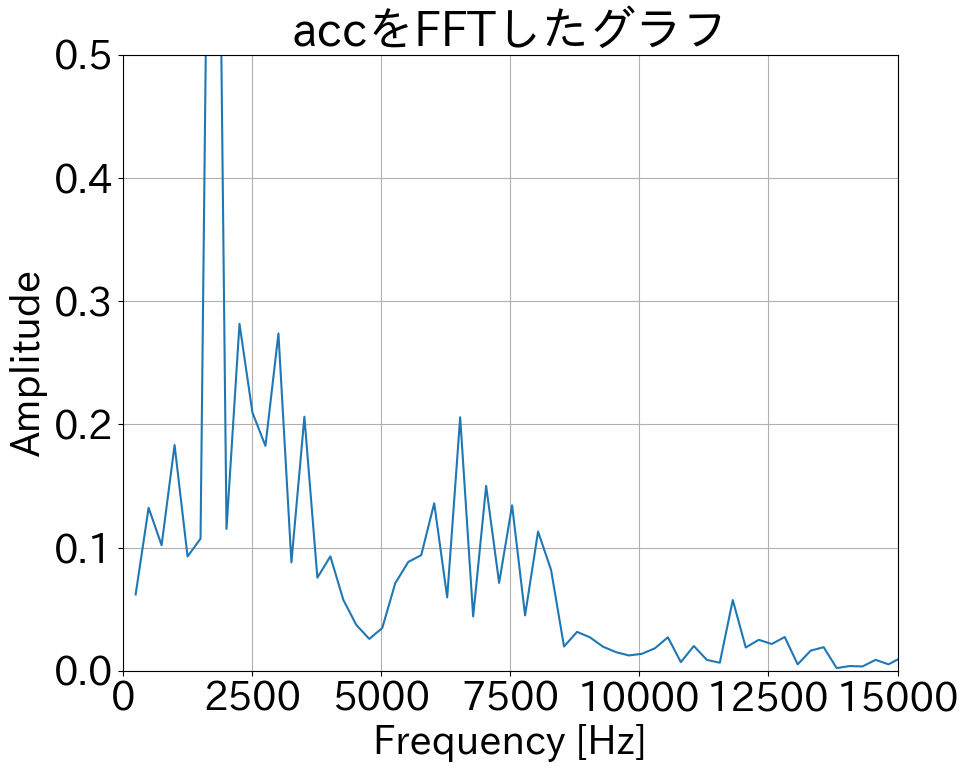

window_data:            time          x          y         z        abs
4400  88.273088   6.675035   8.609550 -2.269703  11.127982
4401  88.293056   7.192182   8.398860 -3.217807  11.516189
4402  88.313059   8.494628   8.398860 -3.869030  12.556630
4403  88.333077   9.222465   8.552089 -4.252102  13.276763
4404  88.353061   8.954314   8.973468 -3.773262  13.226503
...         ...        ...        ...       ...        ...
4595  92.173054   8.245630  11.099519 -6.378153  15.227297
4596  92.193051   8.992621  11.042058 -5.870583  15.403182
4597  92.213033   8.101978   9.643845 -5.315128  13.671005
4598  92.233043   9.050082   8.236053 -5.085284  13.251290
4599  92.253066  10.515334   8.331821 -5.688623  14.572300

[200 rows x 5 columns]
サンプリング周波数: 50251.54301822654 Hz
サンプリング間隔: 1.989988645000003e-05 sec
収録時間: 0.0039799772900000075
データ数: 200
最大周波数: 25125.77150911327 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.771509113274 Hz
最大周波数の振幅: [0.07130039 0.13155081 0.21814151 0.19291853 0.0

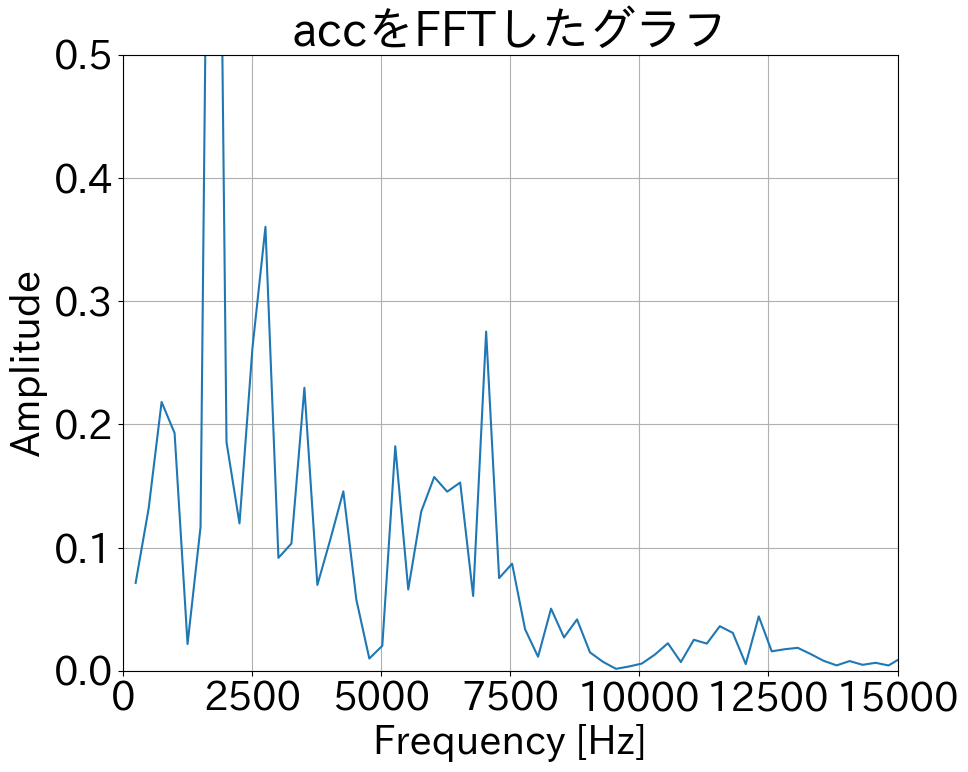

window_data:            time          x          y         z        abs
4600  92.273081  12.354081   9.749189 -9.050082  18.154173
4601  92.293054  18.023550  10.036493 -6.071695  21.504535
4602  92.313052  26.326641  12.497733 -1.877054  29.202888
4603  92.333044   1.015141  12.248735 -3.313575  12.729565
4604  92.353074   0.718261   8.063671 -0.660800   8.122521
...         ...        ...        ...       ...        ...
4795  96.173081   5.583278  10.266336 -3.763685  12.277458
4796  96.193053   5.248090  11.243171 -4.702212  13.268841
4797  96.213066   5.353435  11.405977 -4.788404  13.479035
4798  96.233070   6.205771  10.448297 -4.616021  12.999467
4799  96.253055   7.326257  10.256760 -5.669470  13.820928

[200 rows x 5 columns]
サンプリング周波数: 50251.577866253334 Hz
サンプリング間隔: 1.9899872649999998e-05 sec
収録時間: 0.003979974530000007
データ数: 200
最大周波数: 25125.788933126667 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.788933126667 Hz
最大周波数の振幅: [0.06344587 0.14588073 0.35629072 0.23984433 0

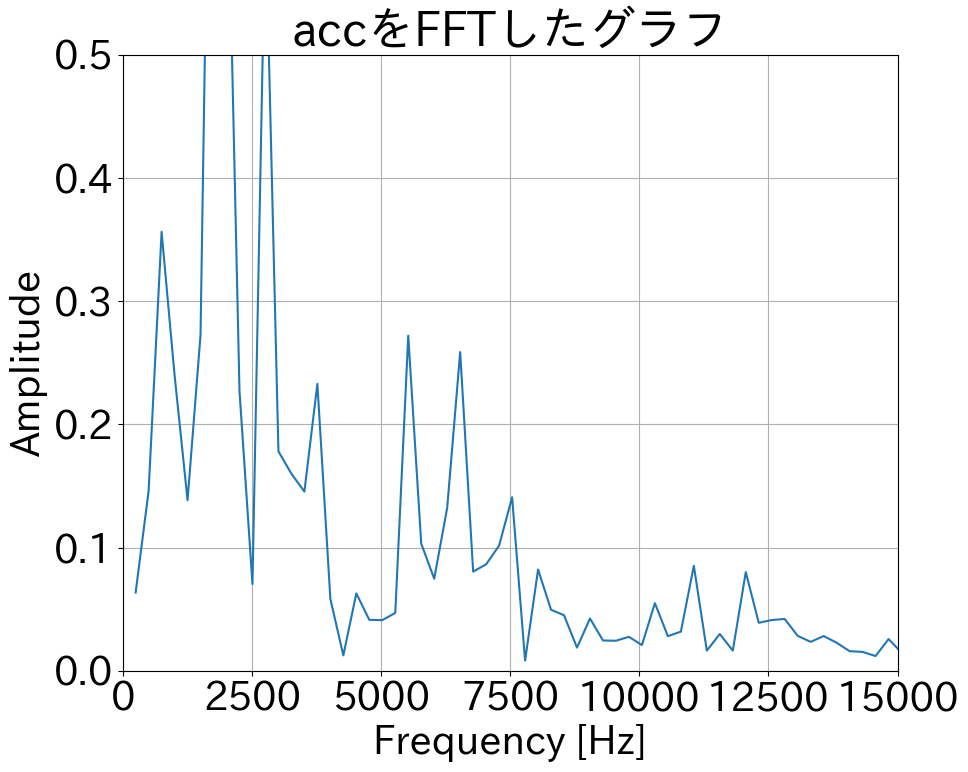

window_data:             time         x          y         z        abs
4800   96.273058  7.967903  10.429143 -6.186617  14.509608
4801   96.293065  9.471462  10.611102 -6.291962  15.552906
4802   96.313069  9.691729  10.304645 -5.937620  15.341794
4803   96.333065  9.911995   9.212888 -4.108450  14.142288
4804   96.353074  9.911995   9.212888 -4.108450  14.142288
...          ...       ...        ...       ...        ...
4995  100.173058  4.826711  11.492168 -4.098873  13.121274
4996  100.193042  4.730943  12.143391 -5.085284  13.989420
4997  100.213041  6.684611  10.936713 -5.861006  14.094223
4998  100.233061  7.862558  10.180145 -5.430049  13.962114
4999  100.253056  7.939173  10.017340 -5.334281  13.850347

[200 rows x 5 columns]
サンプリング周波数: 50251.271685063264 Hz
サンプリング間隔: 1.9899993899999967e-05 sec
収録時間: 0.003979998780000002
データ数: 200
最大周波数: 25125.635842531632 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.635842531632 Hz
最大周波数の振幅: [0.0846587  0.08700368 0.17284435 0.41004521 0

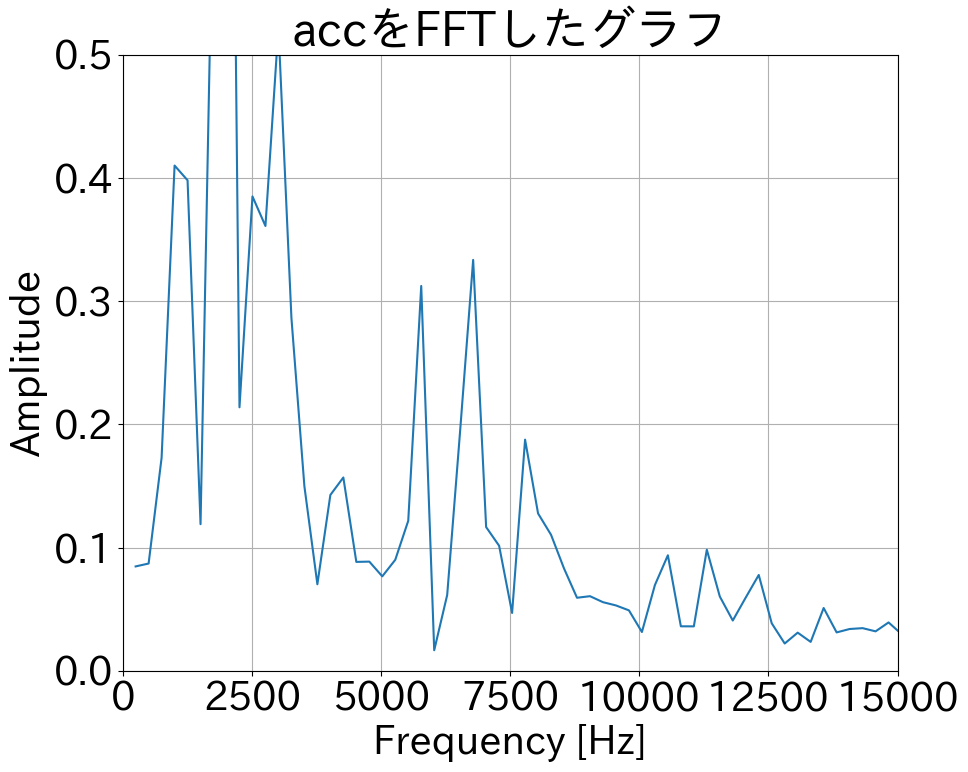

window_data:             time          x          y         z        abs
5000  100.273058   9.165004  10.055647 -5.813122  14.795463
5001  100.293038   9.710882  10.093954 -6.100426  15.277576
5002  100.313048   9.481039   9.260772 -4.185065  13.898445
5003  100.333051  10.907983  10.457873 -3.514688  15.514646
5004  100.353061  12.315774  12.746730 -8.523358  19.667360
...          ...        ...        ...       ...        ...
5195  104.173055   5.200206  11.415554 -5.793968  13.817637
5196  104.193059   6.646304  10.333375 -6.397307  13.851987
5197  104.213087   7.661446   9.777920 -6.454768  13.998910
5198  104.233058   9.337387  10.275913 -7.575254  15.816626
5199  104.253045  11.195287  11.511322 -8.073248  17.972821

[200 rows x 5 columns]
サンプリング周波数: 50251.42294441778 Hz
サンプリング間隔: 1.989993400000001e-05 sec
収録時間: 0.003979986800000006
データ数: 200
最大周波数: 25125.71147220889 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.71147220889 Hz
最大周波数の振幅: [0.2848439  0.25121666 0.08093145 0.41

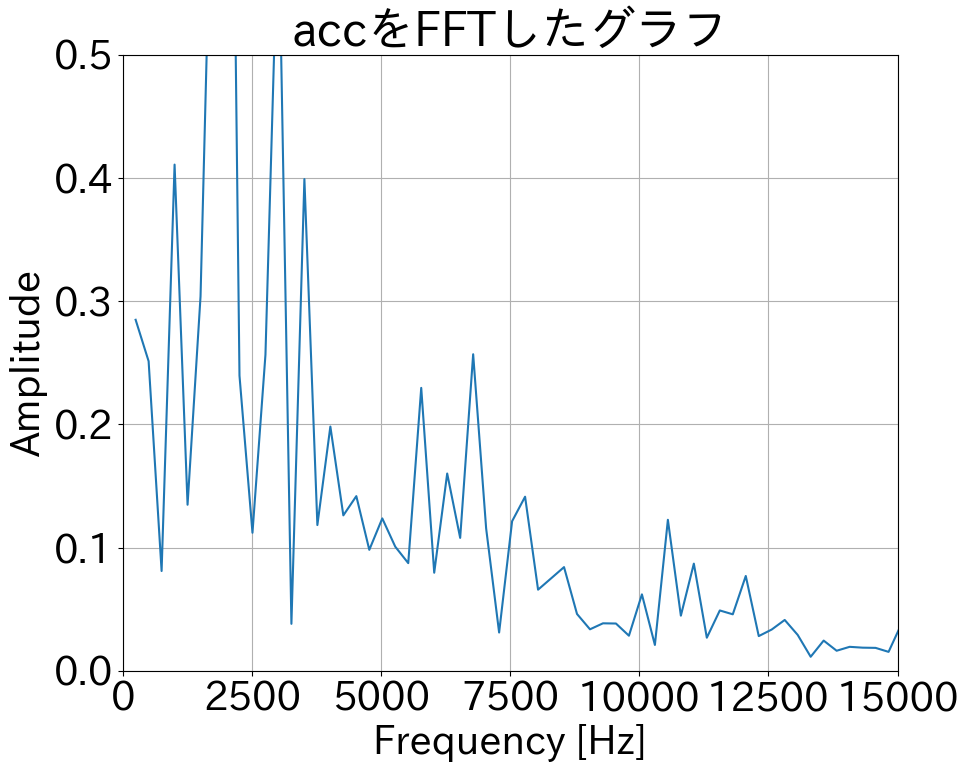

window_data:             time          x          y          z        abs
5200  104.273053   9.988609  11.712435  -6.311116  16.636815
5201  104.293115   8.379706   9.346964  -4.769250  13.428736
5202  104.313053   9.375694   8.485051  -5.037400  13.611581
5203  104.333071  11.204864   9.069236 -10.630256  17.910956
5204  104.353053  13.273455   8.370130 -10.955867  19.138304
...          ...        ...        ...        ...        ...
5395  108.173069   5.123591  12.679692  -5.736507  14.830148
5396  108.193053   6.320693  11.664551  -5.966351  14.546829
5397  108.213574   7.431602  10.390836  -5.612009  13.953237
5398  108.233109  11.061212   9.758766  -7.632715  16.608500
5399  108.253063  10.362105   9.739613  -6.742072  15.738133

[200 rows x 5 columns]
サンプリング周波数: 50251.1274971105 Hz
サンプリング間隔: 1.9900050999999975e-05 sec
収録時間: 0.003980010199999996
データ数: 200
最大周波数: 25125.56374855525 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.56374855525 Hz
最大周波数の振幅: [0.16948483 0.11025747 0.2

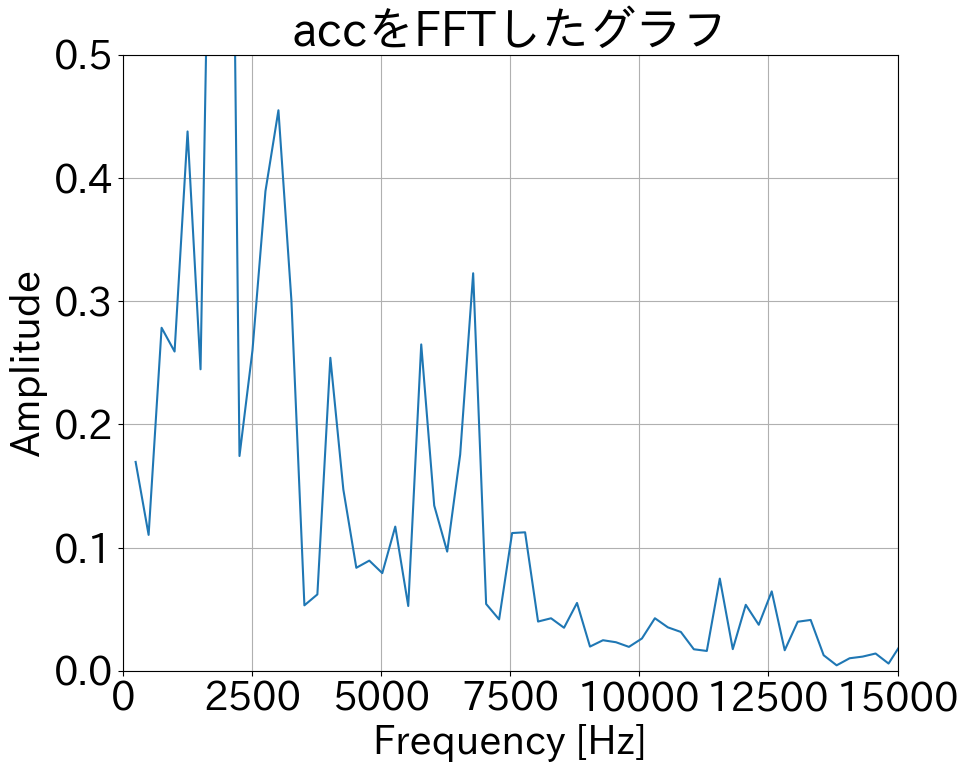

window_data:             time          x          y          z        abs
5400  108.273059   9.126697   8.293514  -4.290410  13.057051
5401  108.293049  10.093954   9.653421  -4.481946  14.668479
5402  108.313063  11.750742  12.066776 -10.065224  19.621309
5403  108.333063  13.637373  10.793061  -8.906430  19.539514
5404  108.353075  20.072987   7.785944  -3.294421  21.780701
...          ...        ...        ...        ...        ...
5595  112.173043   7.996634  11.032481  -5.832275  14.821512
5596  112.193056   9.011775  10.735600  -6.962338  15.650539
5597  112.213054  10.994174  10.975020  -6.895301  16.996120
5598  112.233055  10.170568  11.137826  -6.722919  16.513306
5599  112.253059   8.398860   9.030929  -5.410896  13.467602

[200 rows x 5 columns]
サンプリング周波数: 50251.26006919063 Hz
サンプリング間隔: 1.9899998499999934e-05 sec
収録時間: 0.003979999699999993
データ数: 200
最大周波数: 25125.630034595313 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.630034595313 Hz
最大周波数の振幅: [0.17707121 0.18909224 

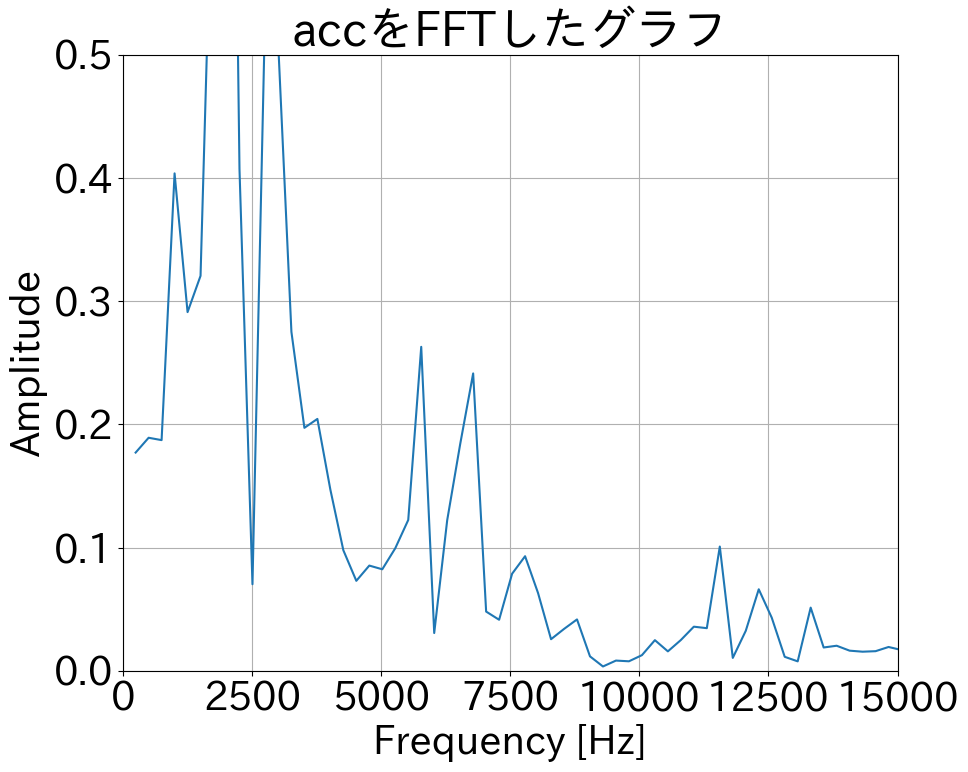

window_data:             time          x          y         z        abs
5600  112.273056   9.777920   8.034941 -4.022259  13.279554
5601  112.293070  11.051635  10.304645 -7.326257  16.792807
5602  112.313068  16.203957   7.728483 -5.267244  18.709397
5603  112.333087  16.203957   7.728483 -5.267244  18.709397
5604  112.353087  21.997925  11.252748  4.721366  25.156000
...          ...        ...        ...       ...        ...
5795  116.173069   9.682152  10.046070 -6.943185  15.584460
5796  116.193057  10.984597  11.147403 -7.134721  17.199715
5797  116.213311   9.126697  10.534488 -6.129156  15.226246
5798  116.233058   8.743625   8.207323 -3.169923  12.404013
5799  116.253074  11.089942   9.299079 -4.635174  15.196859

[200 rows x 5 columns]
サンプリング周波数: 50251.02901544664 Hz
サンプリング間隔: 1.990009000000001e-05 sec
収録時間: 0.003980018000000001
データ数: 199
最大周波数: 25125.51450772332 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.25564085034 Hz
最大周波数の振幅: [0.17465109 0.20828552 0.22303811 0.2466

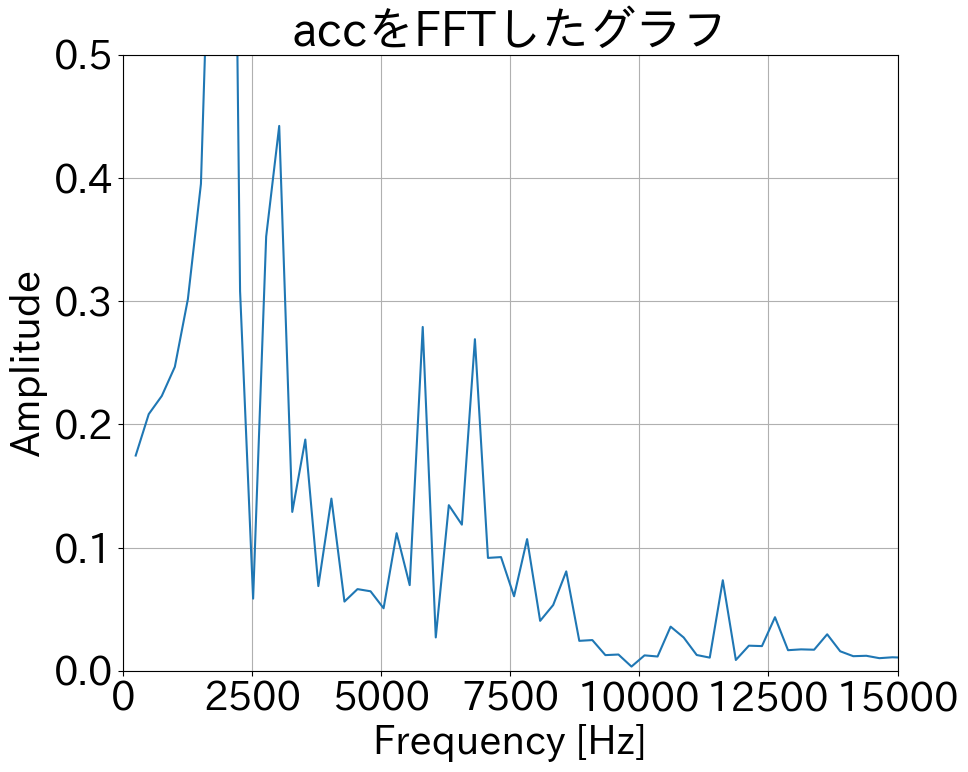

window_data:             time          x          y          z        abs
5800  116.273078  12.679692  11.999739 -11.425131  20.863891
5801  116.293058  16.395493  10.026917  -6.636727  20.332176
5802  116.313061  23.003490   9.452309  -0.191536  24.870533
5803  116.333048  19.153614  15.514427   1.340753  24.685137
5804  116.353056   3.217807  13.330915  -4.673482  14.488237
...          ...        ...        ...        ...        ...
5995  120.173060   9.050082  10.362105  -6.569689  15.245919
5996  120.193068   9.911995  10.285490  -5.516241  15.312343
5997  120.213044   8.599973   9.289502  -5.372589  13.752058
5998  120.233437   8.992621   8.331821  -4.539406  13.072593
5999  120.253056  10.754754   9.940725  -4.797980  15.411144

[200 rows x 5 columns]
サンプリング周波数: 50251.541629357154 Hz
サンプリング間隔: 1.9899886999999936e-05 sec
収録時間: 0.003979977399999996
データ数: 200
最大周波数: 25125.770814678577 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.770814678577 Hz
最大周波数の振幅: [1.31471777e-01 2.1677

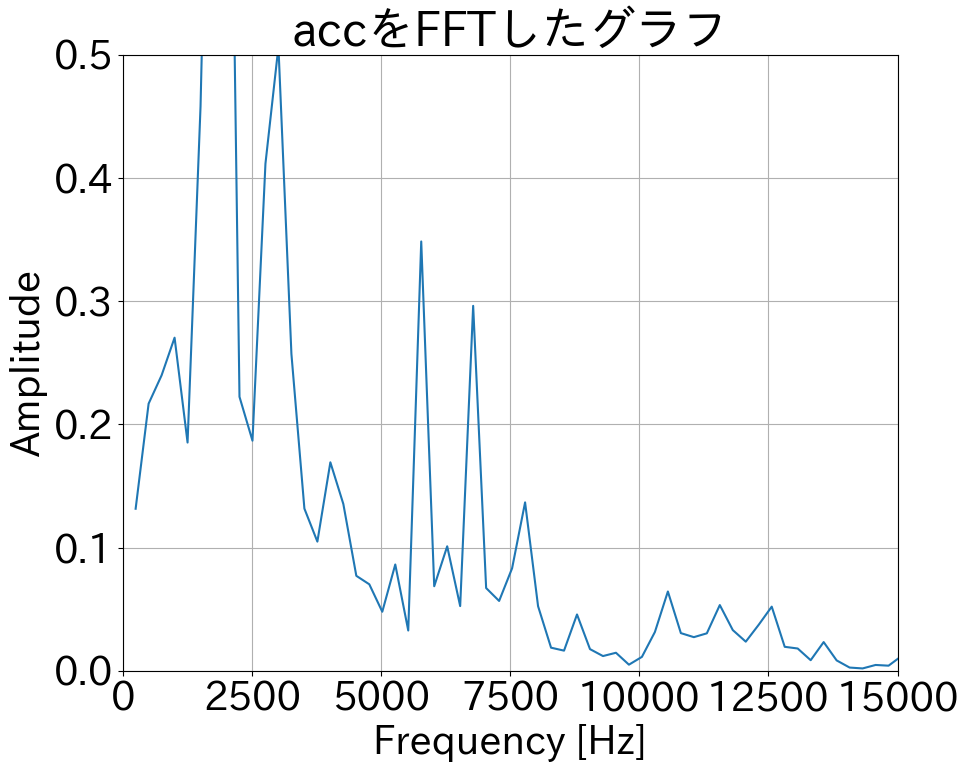

window_data:             time          x          y          z        abs
6000  120.273055  12.085930  11.635820 -10.314221  19.693785
6001  120.293066  17.544710  10.879252  -6.167464  21.545593
6002  120.313060  25.924416  11.405977  -1.043872  28.341865
6003  120.333086  16.002844  15.466543   1.522712  22.307479
6004  120.353050   2.930503  11.635820  -2.001553  12.164965
...          ...        ...        ...        ...        ...
6195  124.173055   0.296881   1.484405  -8.676587   8.807654
6196  124.193041  -1.177947  -0.095768  -8.599973   8.680798
6197  124.213037  -0.670376  -0.794875  -9.232041   9.290415
6198  124.233050  -0.335188  -1.130063  -9.739613   9.810680
6199  124.253055  -0.248997  -1.359907  -9.414001   9.514976

[200 rows x 5 columns]
サンプリング周波数: 50251.25628140707 Hz
サンプリング間隔: 1.9899999999999986e-05 sec
収録時間: 0.003980000000000004
データ数: 200
最大周波数: 25125.628140703535 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.628140703535 Hz
最大周波数の振幅: [0.60799996 0.63295533 

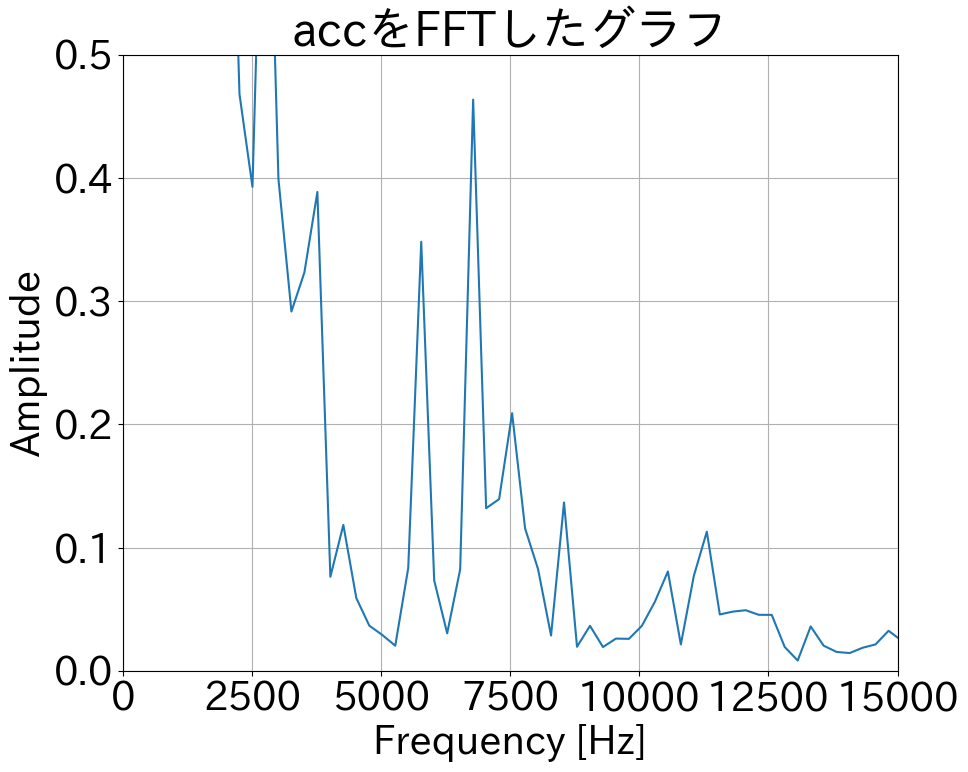

window_data:             time          x         y          z        abs
6200  124.273061   0.938527 -1.187524  -8.370130   8.505887
6201  124.293043   7.862558  1.177947  -2.432509   8.314114
6202  124.313057  17.784130  2.317587  -7.757214  19.540237
6203  124.333072  12.200851  2.049437  -0.708684  12.392062
6204  124.353076   2.135628 -1.493982  -3.696647   4.523062
...          ...        ...       ...        ...        ...
6395  128.173069   1.829170 -4.328717  -4.405331   6.441319
6396  128.193072  11.300632 -4.414908  -4.568137  12.963934
6397  128.213049  11.300632 -4.414908  -4.568137  12.963934
6398  128.233058  22.055386 -1.197101  11.185710  24.758699
6399  128.253384   5.631162 -4.146757   6.694188   9.680792

[200 rows x 5 columns]
サンプリング周波数: 50247.17590772532 Hz
サンプリング間隔: 1.9901615999999983e-05 sec
収録時間: 0.003980323200000001
データ数: 200
最大周波数: 25123.58795386266 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25123.58795386266 Hz
最大周波数の振幅: [0.46430414 0.62268273 0.55213926 0.8

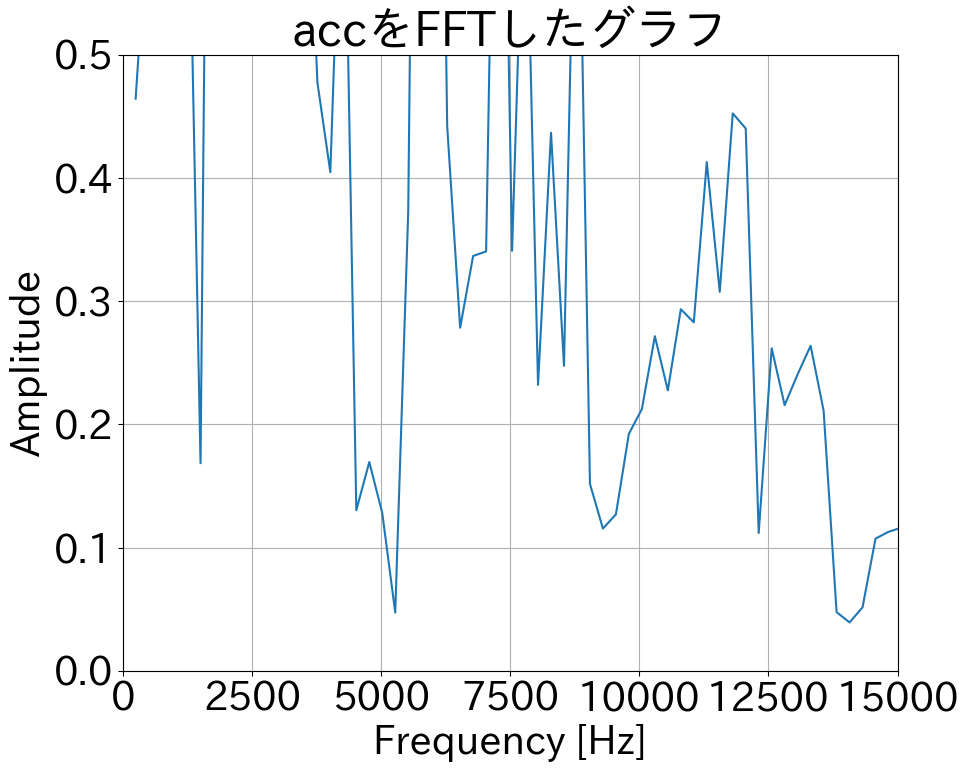

window_data:             time          x          y          z        abs
6400  128.273103  -8.130709  -6.224925  -3.658340  10.873894
6401  128.293052  -7.987057  -4.951209  -8.906430  12.947279
6402  128.313056  -1.321599  -7.211336 -10.170568  12.537562
6403  128.333062  38.326382  -5.851429  13.292608  40.985902
6404  128.353055  71.270599 -22.543802 -40.059784  84.808653
...          ...        ...        ...        ...        ...
6595  132.173064   1.982399  -5.698200   0.210690   6.036869
6596  132.193057  -4.778827  -7.508216  -4.472369   9.960551
6597  132.213075  -4.424485  -6.770802  -4.587290   9.298552
6598  132.233059  -1.139640  -7.029376  -3.102885   7.767806
6599  132.253058  15.313314 -14.748282  15.198392  26.134279

[200 rows x 5 columns]
サンプリング周波数: 50251.82571792461 Hz
サンプリング間隔: 1.9899774499999996e-05 sec
収録時間: 0.0039799548999999955
データ数: 199
最大周波数: 25125.912858962303 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.651990324302 Hz
最大周波数の振幅: [0.90690893 1.54083726 0

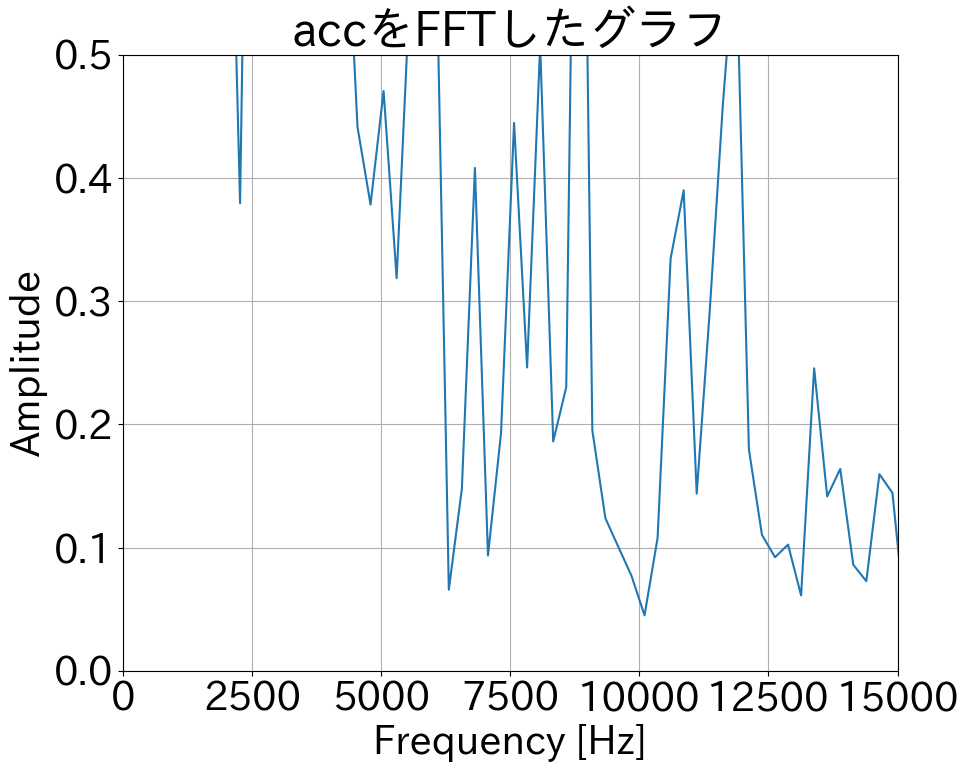

window_data:             time          x          y          z         abs
6600  132.273055  78.453201 -10.591949 -78.453201  111.454022
6601  132.293035  25.512613 -12.708423 -23.147142   36.717675
6602  132.313050  10.371682  -4.845864  -7.412448   13.638130
6603  132.333067   6.253655  -3.131616  -7.862558   10.523072
6604  132.353056   4.539406  -3.869030  -7.240066    9.380520
...          ...        ...        ...        ...         ...
6795  136.173055  17.420212 -12.133814  19.239805   28.650712
6796  136.193062  77.936050 -26.575640 -78.453201  113.733009
6797  136.213066  22.170307 -14.211981 -15.342045   30.477553
6798  136.233050   7.086837  -3.179500  -9.232041   12.064952
6799  136.253067   3.361459  -2.930503  -7.508216    8.732730

[200 rows x 5 columns]
サンプリング周波数: 50251.10729571218 Hz
サンプリング間隔: 1.9900058999999943e-05 sec
収録時間: 0.0039800118
データ数: 200
最大周波数: 25125.55364785609 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.55364785609 Hz
最大周波数の振幅: [0.49877704 1.1538532

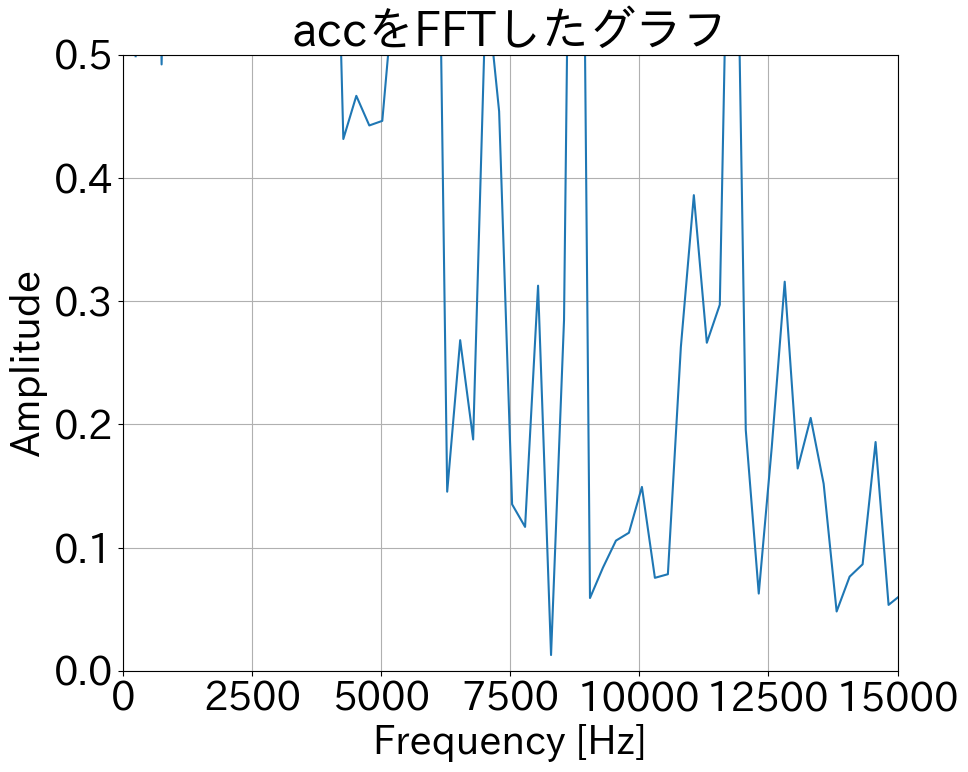

window_data:             time         x         y         z        abs
6800  136.273083  1.350330 -3.409343 -7.929596   8.736447
6801  136.293089  0.134075 -3.945644 -6.952762   7.995435
6802  136.313053 -0.459687 -3.658340 -6.799533   7.734883
6803  136.333062 -0.976834 -4.127604 -6.847417   8.054715
6804  136.353080 -2.365471 -4.865018 -5.104438   7.437684
...          ...       ...       ...       ...        ...
6995  140.173061  8.197746 -7.077260 -6.368577  12.563814
6996  140.193576  7.374141 -7.498640 -5.975927  12.096250
6997  140.213058  5.707777 -7.556100 -5.477933  10.939887
6998  140.233093  5.985504 -6.933608 -4.252102  10.098592
6999  140.253093  8.034941 -6.062119 -1.829170  10.230123

[200 rows x 5 columns]
サンプリング周波数: 50251.13254746236 Hz
サンプリング間隔: 1.9900049000000085e-05 sec
収録時間: 0.003980009800000005
データ数: 199
最大周波数: 25125.56627373118 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.3071467275 Hz
最大周波数の振幅: [1.69974726 2.56646762 1.6335644  0.2839483  0.38171562 1.476190

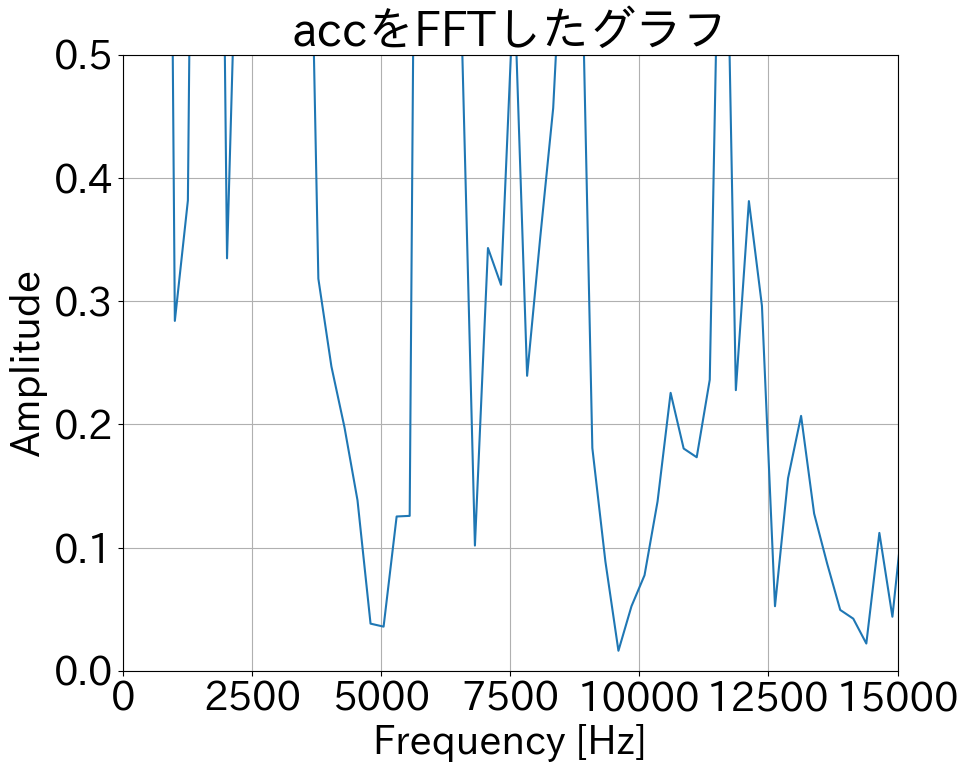

window_data:             time          x          y         z        abs
7000  140.273060  14.901511  -3.409343  2.518700  15.492660
7001  140.293407  18.550274  -3.035848 -4.941632  19.435760
7002  140.313052   5.037400  -8.437167 -2.566584  10.156207
7003  140.333064   1.187524 -11.741165  0.009577  11.801070
7004  140.353069   3.074155 -13.532028  1.675941  13.977661
...          ...        ...        ...       ...        ...
7195  144.173071   8.188169  -6.157887  1.283292  10.325334
7196  144.193060   5.784391  -6.253655  3.026271   9.040227
7197  144.213055   6.885724  -7.718906  5.765238  11.841988
7198  144.233043   8.063671  -6.100426 -0.009577  10.111285
7199  144.253061   9.050082  -6.320693 -1.618480  11.156819

[200 rows x 5 columns]
サンプリング周波数: 50251.24618065411 Hz
サンプリング間隔: 1.990000399999997e-05 sec
収録時間: 0.0039800007999999994
データ数: 200
最大周波数: 25125.623090327055 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.623090327055 Hz
最大周波数の振幅: [0.08121637 0.20713386 0.278059   0

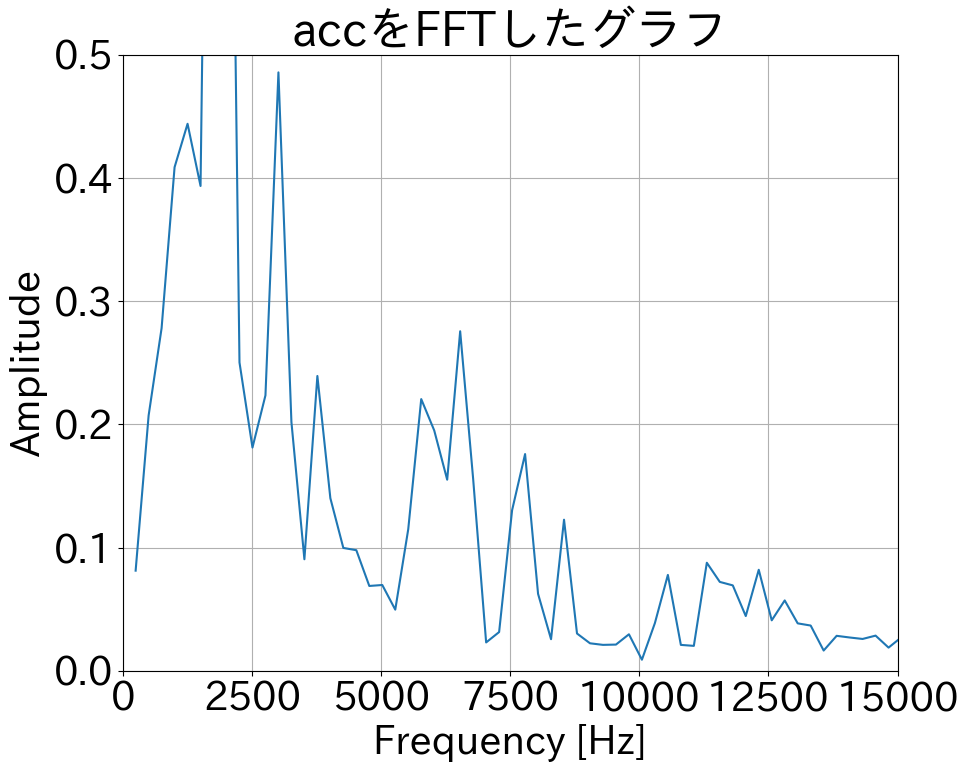

window_data:             time          x          y          z        abs
7200  144.273069  15.409082  -7.441179   6.272809  18.225232
7201  144.293061  20.207062  -4.424485  11.903971  23.866418
7202  144.313056  11.769896  -4.884171   6.435614  14.275948
7203  144.333044   2.346318  -7.891289   6.071695  10.229522
7204  144.353056   1.886631 -10.381259   5.755661  12.019049
...          ...        ...        ...        ...        ...
7395  148.173043   0.316035  -0.411803   0.248997   0.575725
7396  148.193052   0.248997  -0.335188   0.383072   0.566652
7397  148.213075   0.143652  -0.277727   0.430956   0.532439
7398  148.233068   0.057461  -0.335188   0.277727   0.439073
7399  148.253055   0.019154  -0.545878   0.354342   0.651082

[200 rows x 5 columns]
サンプリング周波数: 50251.43304524198 Hz
サンプリング間隔: 1.9899929999999954e-05 sec
収録時間: 0.003979985999999997
データ数: 200
最大周波数: 25125.71652262099 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.71652262099 Hz
最大周波数の振幅: [4.49277561 1.73273555 1.

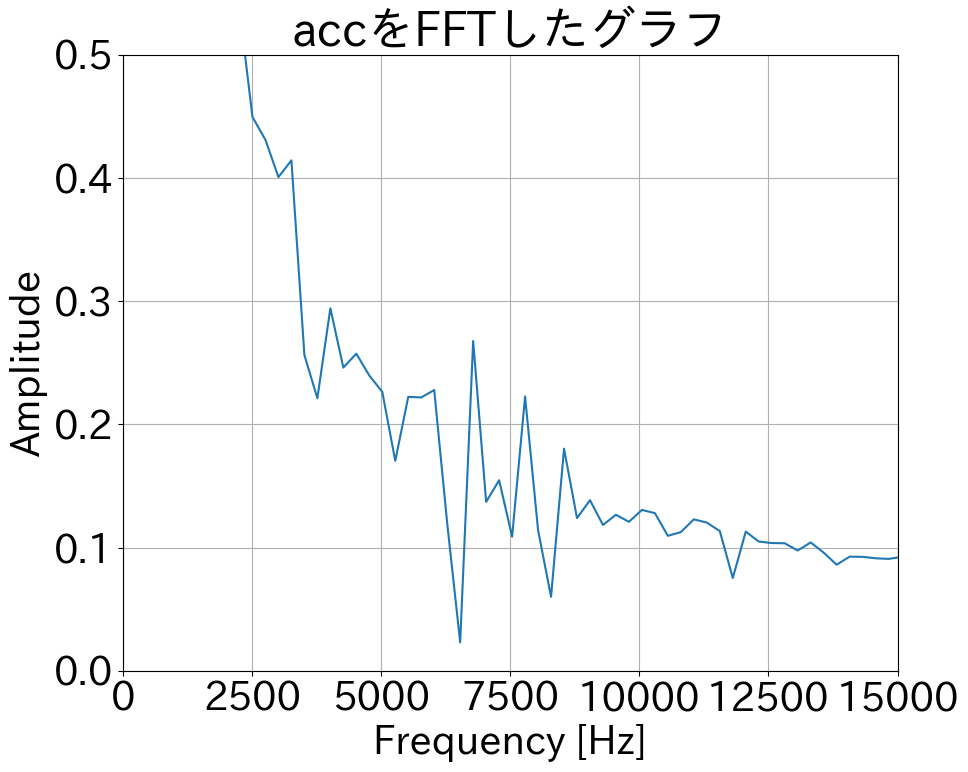

window_data:             time         x         y         z       abs
7400  148.273049  0.105345 -0.603339  0.277727  0.672494
7401  148.293056  0.229843 -0.478840  0.277727  0.599373
7402  148.313055  0.363919 -0.335188  0.124498  0.510184
7403  148.333082  0.354342 -0.248997  0.201113  0.477498
7404  148.353084  0.296881 -0.316035  0.172383  0.466618
...          ...       ...       ...       ...       ...
7595  152.173056  0.383072 -0.076614 -0.440533  0.588798
7596  152.193074  0.316035 -0.038307 -0.440533  0.543521
7597  152.213043  0.296881 -0.095768 -0.354342  0.472089
7598  152.233065  0.239420 -0.124498 -0.363919  0.453055
7599  152.253132  0.124498 -0.124498 -0.248997  0.304958

[200 rows x 5 columns]
サンプリング周波数: 50250.21213755184 Hz
サンプリング間隔: 1.990041349999999e-05 sec
収録時間: 0.003980082699999997
データ数: 199
最大周波数: 25125.10606877592 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24998.849254359964 Hz
最大周波数の振幅: [7.01506596e-02 3.89719628e-02 2.59090371e-02 2.39467806e-02
 8.68903356e-0

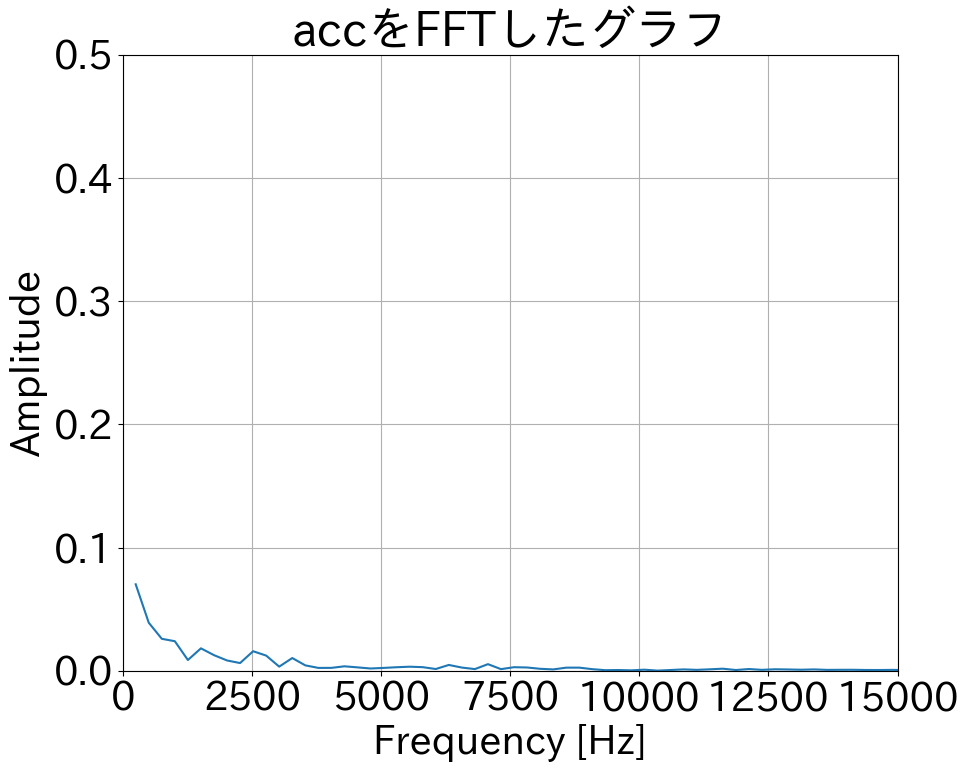

window_data:             time         x         y         z       abs
7600  152.273065  0.086191 -0.191536 -0.363919  0.420181
7601  152.293052  0.201113 -0.210690 -0.220267  0.365177
7602  152.313062  0.421380 -0.172383 -0.095768  0.465240
7603  152.333065  0.440533 -0.095768 -0.181959  0.486159
7604  152.353064  0.181959 -0.095768 -0.229843  0.308397
...          ...       ...       ...       ...       ...
7795  156.173049  0.229843  0.028730  0.335188  0.407437
7796  156.193055  0.220267 -0.019154  0.201113  0.298882
7797  156.213090  0.210690 -0.047884  0.191536  0.288737
7798  156.233068  0.153229  0.000000  0.153229  0.216698
7799  156.253056  0.172383  0.105345  0.028730  0.204056

[200 rows x 5 columns]
サンプリング周波数: 50251.36486475798 Hz
サンプリング間隔: 1.9899957000000107e-05 sec
収録時間: 0.003979991400000017
データ数: 199
最大周波数: 25125.68243237899 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.42272166352 Hz
最大周波数の振幅: [3.49338057e-02 2.19158384e-02 2.27446253e-02 1.28933882e-02
 1.59458083e-0

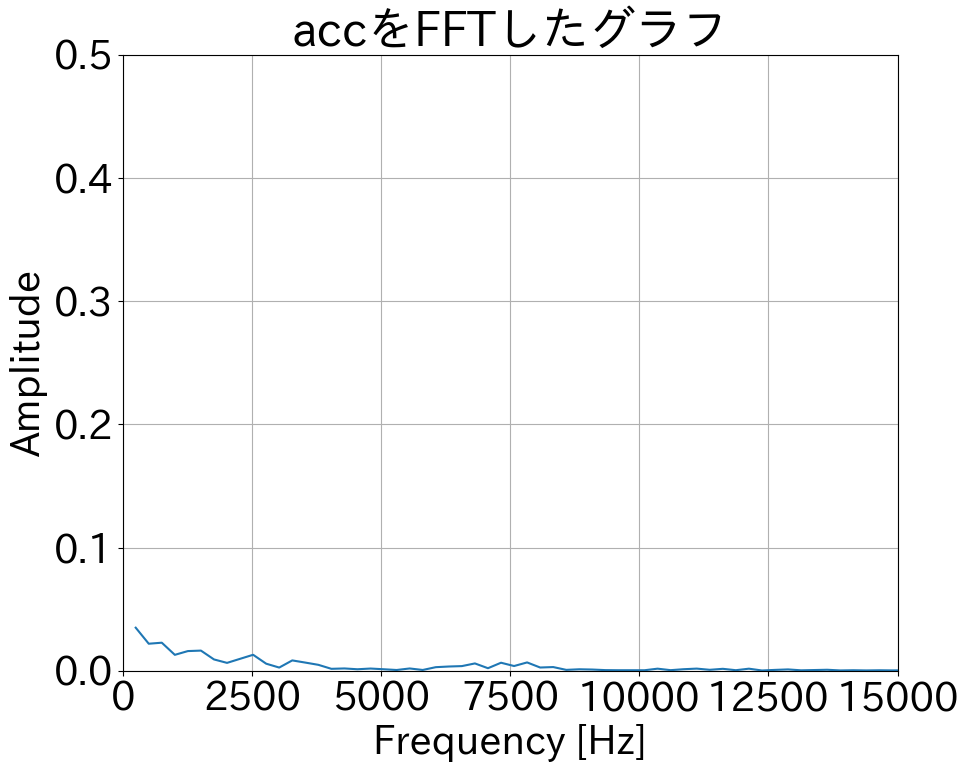

window_data:             time         x         y         z       abs
7800  156.273053  0.229843  0.086191  0.028730  0.247148
7801  156.293045  0.201113  0.019154  0.076614  0.216063
7802  156.313064  0.201113  0.019154  0.105345  0.227839
7803  156.333089  0.210690  0.009577  0.114922  0.240185
7804  156.353064  0.220267  0.009577  0.095768  0.240376
...          ...       ...       ...       ...       ...
7995  160.173085  0.488417 -1.522712  0.383072  1.644369
7996  160.193075  1.082179 -1.896208  0.325611  2.207428
7997  160.213051 -0.028730 -1.312023  0.584185  1.436489
7998  160.233106  0.210690 -0.507571 -0.833182  0.998104
7999  160.253077  0.430956  0.440533 -0.919373  1.106815

[200 rows x 5 columns]
サンプリング周波数: 50250.95957347974 Hz
サンプリング間隔: 1.9900117500000065e-05 sec
収録時間: 0.003980023500000015
データ数: 200
最大周波数: 25125.47978673987 Hz
最大周波数のインデックス: 100
最大周波数のインデックスに対応する周波数: -25125.47978673987 Hz
最大周波数の振幅: [0.29306653 0.19572486 0.09660999 0.02522493 0.08570987 0.14931284
 0.168

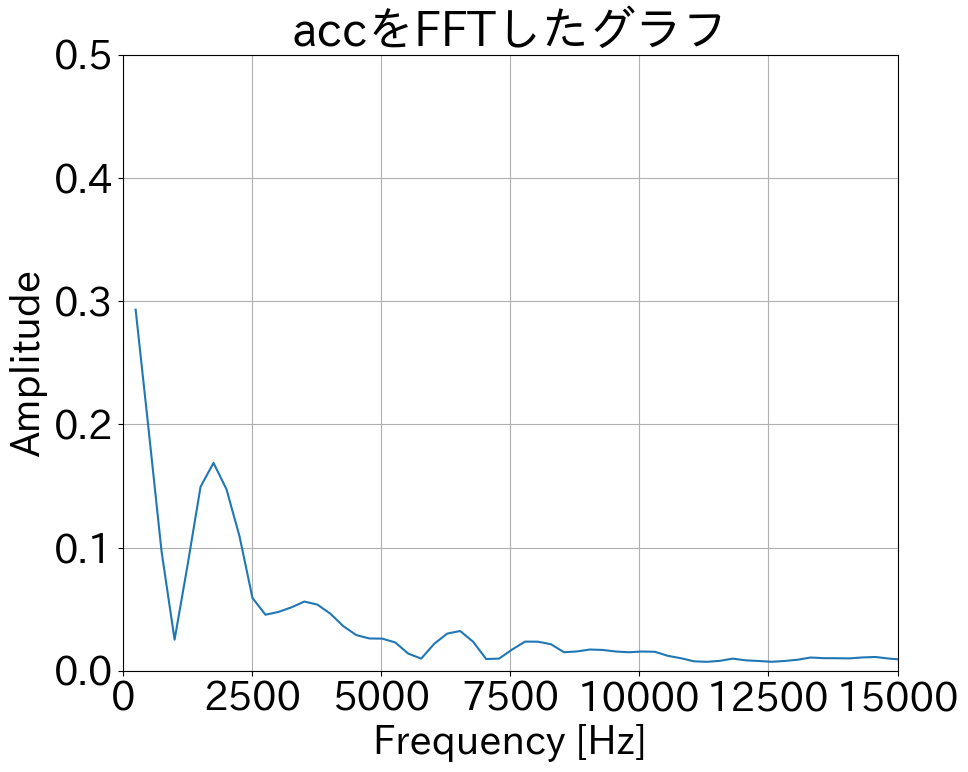

window_data:             time         x         y         z       abs
8000  160.273058 -0.756568  1.618480 -0.507571  1.857283
8001  160.293060 -1.072602  1.675941 -0.344765  2.019435
8002  160.313078 -1.388637  1.867477 -0.804452  2.462301
8003  160.333048 -0.105345  0.995988  1.321599  1.658226
8004  160.353036  1.867477 -0.651223  1.130063  2.277851
...          ...       ...       ...       ...       ...
8195  164.173050 -1.723825 -0.584185 -1.158794  2.157695
8196  164.193058 -1.570596 -0.660800 -0.919373  1.936150
8197  164.213057 -1.101333 -1.790863  0.114922  2.105548
8198  164.233056 -1.158794 -1.723825  0.440533  2.123310
8199  164.253050 -1.312023 -0.325611 -0.957681  1.656677

[200 rows x 5 columns]
サンプリング周波数: 50251.35223876281 Hz
サンプリング間隔: 1.9899962000000104e-05 sec
収録時間: 0.003979992400000015
データ数: 199
最大周波数: 25125.676119381405 Hz
最大周波数のインデックス: 99
最大周波数のインデックスに対応する周波数: 24999.416440389534 Hz
最大周波数の振幅: [1.46518658e+00 4.61577373e-01 9.12635726e-02 5.83003898e-01
 3.88860895e

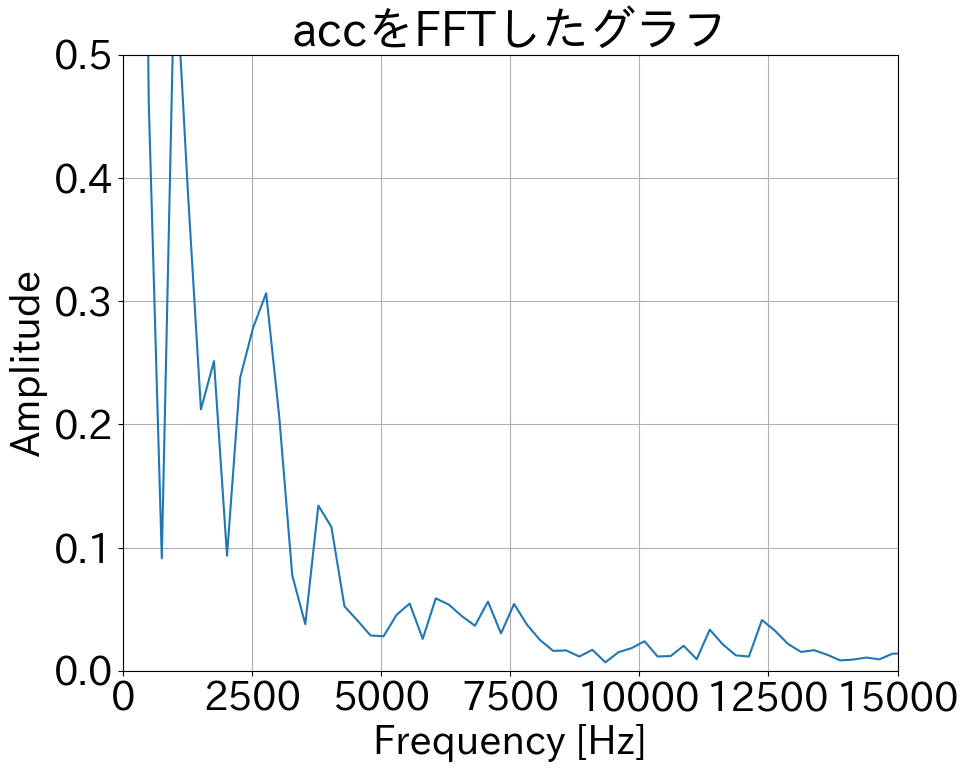

動画を保存しました


<Figure size 1000x800 with 0 Axes>

In [7]:


# サンプリング周波数を計算する関数
def calculate_sampling_frequency(data):
    time_stamps = [data_point / 1000 for data_point in data]  # 時間スタンプのリストを作成
    time_interval = time_stamps[-1] - time_stamps[0]  # データ点の間隔を計算
    sampling_frequency = 1 / (time_interval / len(data))  # サンプリング周波数を計算
    return sampling_frequency

# content毎に分割して、BLEのデータをFFTしてみる
# 椅子に座るだけ取得したデータを使う
# ansデータを使って、椅子に座っているかどうかを判定する

# 1. windowサイズ20データ分を用いて、FFTを行う

# DataFrameからnumpy配列に変換
acc_data = acc.to_numpy()

# 動画作成の設定
# 保存先のファイル名
out_filename = 'fft_graph.avi'
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # XVIDコーデックを使用
fps = 10  # フレームレート
frame_size = (640, 480)  # フレームサイズ

# OpenCVのVideoWriterを作成
out = cv2.VideoWriter(out_filename, fourcc, fps, frame_size)

window_size = 200
for i in range(0, len(acc) - window_size, window_size):
    # 1.1. windowサイズ20データ分を取得する
    fft_acc_data = acc[i:i+window_size]   

    print(f"window_data: {fft_acc_data}")

    # accデータからサンプリング周波数を計算する
    sampling_frequency = calculate_sampling_frequency(fft_acc_data["time"])

    # time_diff_isu を FFT してみる

    ### 量子化(離散化) ###
    f_s = sampling_frequency # サンプリングレート f_s[Hz] (任意)
    t_fin = (fft_acc_data["time"].iloc[-1] - fft_acc_data["time"].iloc[0])/1000 # 収録終了時刻 [s] (任意)    dt = 1/f_s # サンプリング周期 dt[s]
    dt = 1/f_s # サンプリング周期 dt[s]
    N = int(f_s * t_fin) # サンプル数 [個]

    x = fft_acc_data["x"]
    y = fft_acc_data["y"]
    z = fft_acc_data["z"]
    norm_acc = np.sqrt(x*x + y*y + z*z).rolling(window=10).mean() # 重力加速度を除去するために、移動平均を取る

    # print(norm_acc)

    print(f"サンプリング周波数: {sampling_frequency} Hz")
    print(f"サンプリング間隔: {dt} sec")
    print(f"収録時間: {t_fin}")
    print(f"データ数: {N}")
    print(f"最大周波数: {sampling_frequency/2} Hz")
    print(f"最大周波数のインデックス: {int(N/2)}")

    ### FFT: tの関数をfの関数にする ###
    y_fft = np.fft.fft(abs(norm_acc[10:len(norm_acc)])) # 離散フーリエ変換
    freq = np.fft.fftfreq(N, d=dt) # 周波数を割り当てる（※後述）
    Amp = abs(y_fft/(N/2)) # 音の大きさ（振幅の大きさ）

    
    print(f"最大周波数のインデックスに対応する周波数: {freq[int(N/2)]} Hz")
    print(f"最大周波数の振幅: {Amp[1:int(N/2)]}")


    print(norm_acc[10:len(norm_acc)])
        ### 音波のスペクトル ###
    plt.plot(freq[1:int(N/2)], Amp[1:int(N/2)]) # A-f グラフのプロット
    # plt.xscale("log") # 横軸を対数軸にセット
    plt.xlim([0,15000]) 
    plt.ylim([0,0.5])
    plt.xlabel("Frequency [Hz]") # 横軸のラベル
    plt.ylabel("Amplitude") # 縦軸のラベル
    plt.grid() # グリッド線を表示
    plt.title("accをFFTしたグラフ") # グラフのタイトル
    # グラフの大きさを書く1000.800
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.show()

    # グラフを画像に変換
    fig = plt.gcf()  # 現在のFigureを取得
    fig.canvas.draw()  # グラフを描画
    img_array = np.array(fig.canvas.renderer.buffer_rgba())

    # RGBからBGRに変換
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGBA2BGR)

    # 動画ファイルにフレームを書き込む
    out.write(img_bgr)

    plt.clf()  # グラフをクリア

# 動画ファイルを閉じる
out.release()

print("動画を保存しました")

    





